# Đồ Án Tốt Nghiệp

**Trung Tâm Tin Học - Đại Học Khoa Học Tự Nhiên**

Chương trình: **Applied Data Science**

Tên đồ án: **Dự đoán mức tiêu thụ nhiên liệu cho một số hãng xe hơi**

Học viên: **Nguyễn Lam Duy**

# Mục Lục

* [Giới Thiệu](#gioithieu)
* [Dữ Liệu](#dulieu)
* [Tiền Xử Lý Dữ Liệu](#tienxuly)
* [Lựa Chọn Mô Hình](#luachonmohinh)
* [Xây Dựng Mô Hình](#xaydungmohinh)
* [Xây Dựng Mô Hình (Không Loại Bỏ Outlier)](#xaydungmohinh2)
* [Xây Dựng Mô Hình RFR (Không Loại Bỏ Outlier)](#xaydungmohinh3)
* [Giải Pháp Giảm Tiêu Thụ Nhiên Liệu](#giaiphap)
* [Bổ Sung](#bosung)

# Giới Thiệu <a name="gioithieu"></a>

Trong đồ án này, chúng ta sẽ dự đoán mức tiêu thụ nhiên liệu (L/100 KM) của một số hãng xe hơi như Audi, Jeep, Renaul, v.v... bằng các thuật toán Regression.

Dữ liệu sẽ được thu thập từ trang [Carsguide](https://www.carsguide.com.au/) là một trang chuyên bán xe hơi qua sử dụng của Úc, bằng kỹ thuật web scraping.

Nhưng thông tin sẽ thu thập bao gồm:
- title: Tên xe
- make: Tên hãng xe
- family: Tên dòng xe
- variant: Tên biến thể của dòng xe
- series: Đợt phát hành xe
- body_type: Kiểu thân xe
- doors: Số lượng cửa
- seating_capacity: Số lượng chổ ngồi
- tranmission_type: Loại hộp số
- drive_type: Hệ thống dẫn động
- engine_cc: Dung tích động cơ
- cylinders: Số lượng xi-lanh
- fuel_type: Loại nhiên liệu
- fuel_consumption: Mức tiêu thụ nhiên liệu (l/100km)
- co2_level: Mức thải CO2
- overal_height: Chiều cao tổng thể
- overal_weight: Cân nặng tổng thể
- overal_length: Chiều dài tổng thể
- overal_width: Chiều rộng tổng thể
- wheelbase: Chiều dài trục xe.

# Dữ Liệu <a name="dulieu"></a>

Cách tiếp cận của tôi như sau:
1. Lấy thông tin của 01 mẫu xe.
2. Lấy thông tin trên 01 trang (01 trang gồm 12 mẫu xe).
3. Lấy thông tin trên nhiều trang dựa theo tên hãng xe (Make).

## Dữ Liệu Của Một Mẫu Xe

Đầu tiên, tôi sẽ gửi request tới website để lấy thông tin của một mẫu xe duy nhất là [2019 BMW X1 Xdrive 25I](https://www.carsguide.com.au/cars-for-sale/11356573/BMW--X1--NT+-+North--TIWI+0810,+NT--SUV?searchKey=cg_s.493d2ec4684ee6c8a9ff95f4dc97217d#pos2).

In [ ]:
from requests import get
url = 'https://www.carsguide.com.au/cars-for-sale/11356573/BMW--X1--NT+-+North--TIWI+0810,+NT--SUV?searchKey=cg_s.493d2ec4684ee6c8a9ff95f4dc97217d#pos2'
response = get(url)
response.status_code

200

Response 200 nghĩa là chúng ta đã request thành công đến đường dẫn trên.

In [ ]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

Tiếp theo, tôi muốn lấy thông tin của tên xe (title).

Khi bôi đen tên xe trên website, bấm chuột phải và chọn Inspect, chúng ta sẽ thấy cấu trúc chứa thành phần tên xe như sau:

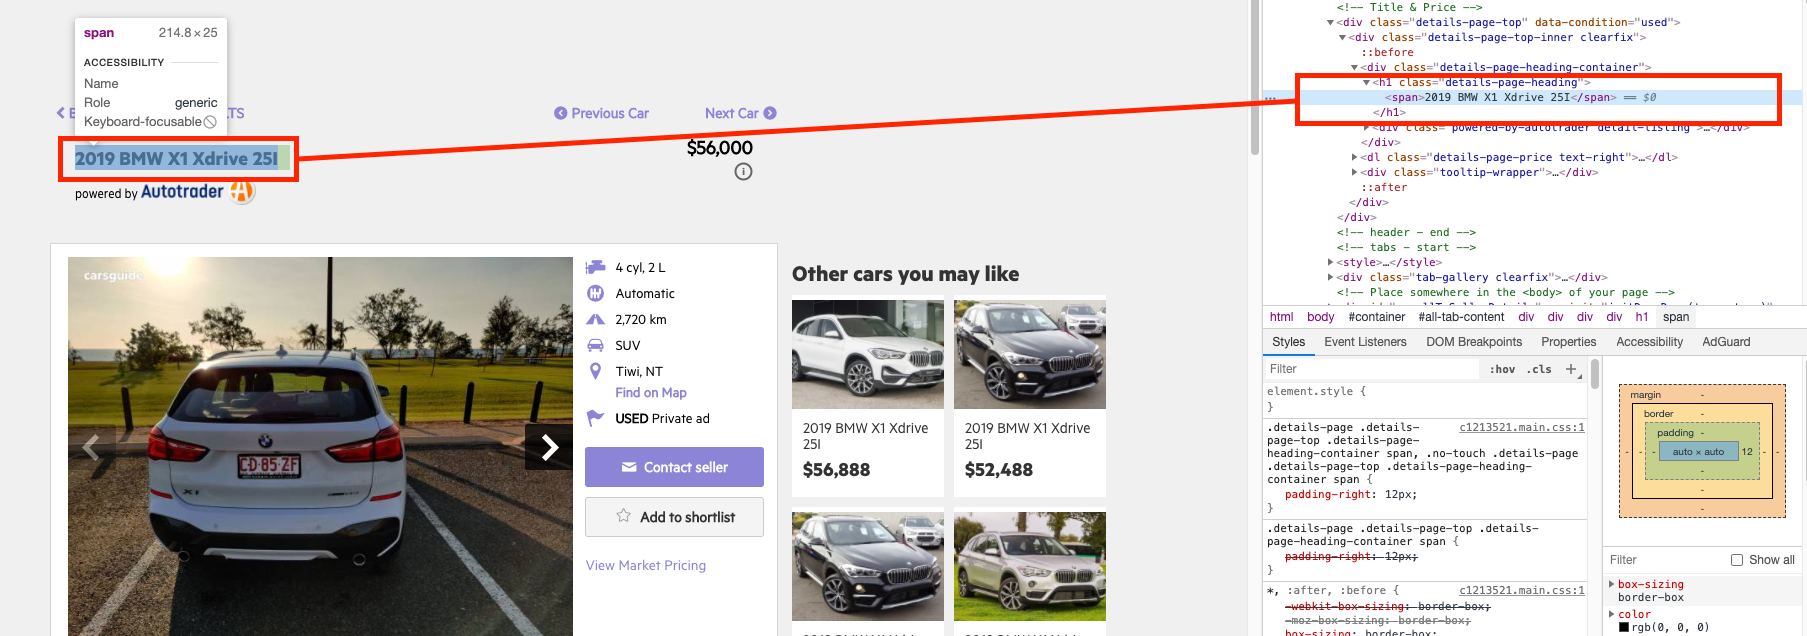

In [ ]:
from IPython.display import Image
Image("img1.png")

Chỉ cần sử dụng phương thức [find()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find) trong BeautifulSoup để tìm tag chứa tên xe là `h1`.

In [ ]:
details_page_heading = html_soup.find('h1', class_ = 'details-page-heading')
print(type(details_page_heading))
print(len(details_page_heading))
print('\n')
print(details_page_heading)

<class 'bs4.element.Tag'>
3


<h1 class="details-page-heading">
<span>2019 BMW X1 Xdrive 25I</span>
</h1>


Công việc tiếp theo đơn giản chỉ là lấy phần nội dung `text` từ các tag này ra.

In [ ]:
car_title = details_page_heading.span.text
print(car_title)

2019 BMW X1 Xdrive 25I


Các thông tin tiếp theo chúng ta làm tương tự: Bôi đen thông tin cần lấy -> chọn inspect -> xác định tag chứa nội dung cần tìm -> trích xuất nội dung ấy ra.

In [ ]:
details_page_glance = html_soup.find('table', class_ = 'details-page-tab-table more-details clearfix')
body_type = details_page_glance.td.text
print(body_type)

$56,000                      


In [ ]:
rows = details_page_glance.findChildren(['th', 'tr'])
glanceList = []
for row in rows:
    cells = row.findChildren('td')
    for cell in cells:
        strValue = cell.string
        glanceList.append(strValue)
print(glanceList)

['$56,000                      ', '2019 BMW X1 Xdrive 25I F48 MY19', None, 'SUV, 4 Doors, 5 Seats', 'Automatic', '4 cyl, 2 L', 'AWD', 'Premium', '6.6 L / 100 km', '2,720 km', 'Used', 'WHITE / BLACK', 'CD85ZF', '2020-12-31', '-', '-', None]


In [ ]:
body_type = glanceList[3]
print(body_type)

SUV, 4 Doors, 5 Seats


In [ ]:
tab_tech_specs = html_soup.find_all('dl', class_ = 'details-page-tab-desc-list clearfix')
print(type(tab_tech_specs))
print(len(tab_tech_specs))
print(tab_tech_specs[0])

<class 'bs4.element.ResultSet'>
8
<dl class="details-page-tab-desc-list clearfix" collapse="!techSpecsComfort">
<dt>Seating capacity:</dt>
<dd>5</dd>
</dl>


In [ ]:
techSpecsComfort = tab_tech_specs[0].find_all('dd')
techSpecsTrans = tab_tech_specs[1].find_all('dd')
techSpecsExterior = tab_tech_specs[2].find_all('dd')
techSpecsPerformance = tab_tech_specs[3].find_all('dd')
techSpecsDimensions = tab_tech_specs[4].find_all('dd')
techSpecsGeneral = tab_tech_specs[5].find_all('dd')

In [ ]:
make = techSpecsGeneral[1].text
family = techSpecsGeneral[0].text
variant = techSpecsGeneral[2].text
series = techSpecsGeneral[3].text
doors = techSpecsExterior[4].text
seating_capacity = techSpecsComfort[0].text
transmission_type = techSpecsTrans[0].text
drive_type = techSpecsTrans[1].text
engine_cc = techSpecsPerformance[1].text
cylinders = techSpecsPerformance[2].text
fuel_type = techSpecsPerformance[7].text
fuel_consumption = techSpecsPerformance[9].text
co2_level = techSpecsPerformance[15].text
overal_height = techSpecsDimensions[0].text
overal_lenght = techSpecsDimensions[1].text
overal_width = techSpecsDimensions[2].text
wheelbase = techSpecsDimensions[4].text

print(car_title, make, family, variant, series, body_type, doors, seating_capacity, transmission_type, drive_type, 
      engine_cc, cylinders, fuel_type, fuel_consumption, co2_level, overal_height, overal_lenght, overal_width, wheelbase)

2019 BMW X1 Xdrive 25I BMW X1 Xdrive 25I F48 MY19 SUV, 4 Doors, 5 Seats 4 5 Automatic AWD 1998 4 Premium 6.6 L / 100 km 154 1598 mm 4439 mm 1821 mm 2670 mm


Việc lấy thông tin của một mẫu xe đã thành công. Tiếp theo, tôi sẽ lấy thông tin của nhiều mẫu xe trên cùng một 
trang.

## Dữ Liệu Của Nhiều Mẫu Xe Trên Một Trang

Nhấp chọn [link](https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/bmw?searchOffset=0&searchLimit=12) chúng ta sẽ thấy, trang 1 có 12 mẫu xe. Ở phần này, tôi sẽ thu thập tất cả 12 mẫu xe trên trang đầu tiên.

Tạo hàm để lấy dữ liệu của 1 mẫu xe.

In [ ]:
def oneCar(input_link):
    # download content of single page:
    url = input_link
    response = get(url)
    response.status_code
    
    # parse the HTML content
    html_soup = BeautifulSoup(response.text, 'html.parser')
    
    # extract car's title
    details_page_heading = html_soup.find('h1', class_ = 'details-page-heading')
    car_title = details_page_heading.span.text
    
    # extract body type
    details_page_glance = html_soup.find('table', class_ = 'details-page-tab-table more-details clearfix')
    rows = details_page_glance.findChildren(['th', 'tr'])
    glanceList = []
    for row in rows:
        cells = row.findChildren('td')
        for cell in cells:
            strValue = cell.string
            glanceList.append(strValue)
    body_type = glanceList[3]
    
    # extract all tech specs
    tab_tech_specs = html_soup.find_all('dl', class_ = 'details-page-tab-desc-list clearfix')
     
    techSpecsComfort = tab_tech_specs[0].find_all('dd')
    techSpecsTrans = tab_tech_specs[1].find_all('dd')
    techSpecsExterior = tab_tech_specs[2].find_all('dd')
    techSpecsPerformance = tab_tech_specs[3].find_all('dd')
    techSpecsDimensions = tab_tech_specs[4].find_all('dd')
    techSpecsGeneral = tab_tech_specs[5].find_all('dd')

    make = techSpecsGeneral[1].text
    family = techSpecsGeneral[0].text
    variant = techSpecsGeneral[2].text
    series = techSpecsGeneral[3].text
    doors = techSpecsExterior[4].text
    seating_capacity = techSpecsComfort[0].text
    transmission_type = techSpecsTrans[0].text
    drive_type = techSpecsTrans[1].text
    engine_cc = techSpecsPerformance[1].text
    cylinders = techSpecsPerformance[2].text
    fuel_type = techSpecsPerformance[7].text
    fuel_consumption = techSpecsPerformance[9].text
    co2_level = techSpecsPerformance[15].text
    overal_height = techSpecsDimensions[0].text
    overal_lenght = techSpecsDimensions[1].text
    overal_width = techSpecsDimensions[2].text
    wheelbase = techSpecsDimensions[4].text

    # Append data to lists
    titleList.append(car_title)
    makeList.append(make)
    familyList.append(family)
    variantList.append(variant)
    seriesList.append(series)
    body_typeList.append(body_type)
    doorsList.append(doors)
    seating_capacityList.append(seating_capacity)
    transmission_typeList.append(transmission_type)
    drive_typeList.append(drive_type)
    engine_ccList.append(engine_cc)
    cylindersList.append(cylinders)
    fuel_typeList.append(fuel_type)
    fuel_consumptionList.append(fuel_consumption)
    co2_levelList.append(co2_level)
    overal_heightList.append(overal_height)
    overal_lenghtList.append(overal_lenght)
    overal_widthList.append(overal_width)
    wheelbaseList.append(wheelbase)

Gửi request đến trang 1.

In [ ]:
urlPage = 'https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/bmw?searchOffset=0&searchLimit=12'
responsePage = get(urlPage)
responsePage.status_code

200

In [ ]:
html_soupPage = BeautifulSoup(responsePage.text, 'html.parser')
type(html_soupPage)

bs4.BeautifulSoup

In [ ]:
listing_car = html_soupPage.find_all('a', class_ = 'carListing carListing-slideBtn')
print(type(listing_car))
print('\n')
print('Review first element of listing_car:\n', listing_car[0])

<class 'bs4.element.ResultSet'>


Review first element of listing_car:
 <a class="carListing carListing-slideBtn" data-col-pos="1" data-cpo="0" data-listing-id="10950624" data-perf-rating="5" data-rank="0" data-row-pos="1" data-snowplow-listing-id="10950624" href="/cars-for-sale/10950624/BMW--X2------SUV" id="pos0">
<div class="carListing--labelContainer">
</div>
<div class="carListing--content">
<!-- car listing - thumbnails - start -->
<div class="carListing--thumbnails">
<img alt="2020 BMW X2" class="carListing--thumbnail1" src="https://autotraderau-res.cloudinary.com/t_cg_car_m/inventory/2020-02-27/29312330282851/10950624/2020_bmw_x2_New.jpg"/> <ul class="carListing--mediaCount">
<li class="icon icon-camera"><span class="media-count-text">1</span></li>
</ul>
</div>
<!-- car listing - thumbnails - end -->
<!-- car listing - text - start -->
<div class="carListing--text">
<!-- car listing - compare & save buttons (wide screen) - start -->
<!-- car listing - compare & save buttons (wi

Chúng ta thấy rằng đường dẫn đến từng mẫu xe được chứa trong `href` tag. Tôi sẽ trích xuất các đường dẫn này ra.

In [ ]:
href = listing_car[0].get('href')
print(href)

/cars-for-sale/10950624/BMW--X2------SUV


In [ ]:
# Make the list that contains 12 links:

carListing = []
domain = 'https://www.carsguide.com.au'

for item in listing_car:
    href = domain + str(item.get('href'))
    carListing.append(href)

print(len(carListing))
print('\n')
print('Double check few elements in the list:')
print(carListing[0])
print(carListing[5])
print(carListing[11])

12


Double check few elements in the list:
https://www.carsguide.com.au/cars-for-sale/10950624/BMW--X2------SUV
https://www.carsguide.com.au/cars-for-sale/11163670/BMW--M135I------Hatchback
https://www.carsguide.com.au/cars-for-sale/11094432/BMW--X2------SUV


Sau khi kiểm tra ngẫu nhiên vài đường dẫn, chúng ta thấy chúng chỉ về đúng nội dung như mong đợi. Bây giờ chỉ cần tạo vòng lặp qua 12 đường dẫn này để lấy thông tin của từng mẫu xe.

In [ ]:
import pandas as pd

In [ ]:
for each_link in carListing: 
    url = each_link 
    response = get(url) 
    #response.status_code

###### parse the HTML content
    html_soup = BeautifulSoup(response.text, 'html.parser')

    ###### extract car's title
    details_page_heading = html_soup.find('h1', class_ = 'details-page-heading')
    car_title = details_page_heading.span.text

    ###### extract body type
    details_page_glance = html_soup.find('table', class_ = 'details-page-tab-table more-details clearfix')
    rows = details_page_glance.findChildren(['th', 'tr'])
    glanceList = []
    for row in rows:
        cells = row.findChildren('td')
        for cell in cells:
            strValue = cell.string
            glanceList.append(strValue)
    body_type = glanceList[3]

    ###### extract all tech specs
    tab_tech_specs = html_soup.find_all('dl', class_ = 'details-page-tab-desc-list clearfix')

    if len(tab_tech_specs) == 8: # some cars only have 6 specs in tab_tech_specs. We only need cars with full 8 specs.

        techSpecsComfort = tab_tech_specs[0].find_all('dd')
        techSpecsTrans = tab_tech_specs[1].find_all('dd')
        techSpecsExterior = tab_tech_specs[2].find_all('dd')
        techSpecsPerformance = tab_tech_specs[3].find_all('dd')
        techSpecsDimensions = tab_tech_specs[4].find_all('dd')
        techSpecsGeneral = tab_tech_specs[5].find_all('dd')

        make = techSpecsGeneral[1].text
        family = techSpecsGeneral[0].text
        variant = techSpecsGeneral[2].text
        series = techSpecsGeneral[3].text
        doors = techSpecsExterior[4].text
        seating_capacity = techSpecsComfort[0].text
        transmission_type = techSpecsTrans[0].text
        drive_type = techSpecsTrans[1].text
        engine_cc = techSpecsPerformance[1].text
        cylinders = techSpecsPerformance[2].text
        fuel_type = techSpecsPerformance[7].text
        fuel_consumption = techSpecsPerformance[9].text
        co2_level = techSpecsPerformance[15].text
        overal_height = techSpecsDimensions[0].text
        overal_lenght = techSpecsDimensions[1].text
        overal_width = techSpecsDimensions[2].text
        wheelbase = techSpecsDimensions[4].text

        ###### Append data to lists
        titleList.append(car_title)
        makeList.append(make)
        familyList.append(family)
        variantList.append(variant)
        seriesList.append(series)
        body_typeList.append(body_type)
        doorsList.append(doors)
        seating_capacityList.append(seating_capacity)
        transmission_typeList.append(transmission_type)
        drive_typeList.append(drive_type)
        engine_ccList.append(engine_cc)
        cylindersList.append(cylinders)
        fuel_typeList.append(fuel_type)
        fuel_consumptionList.append(fuel_consumption)
        co2_levelList.append(co2_level)
        overal_heightList.append(overal_height)
        overal_lenghtList.append(overal_lenght)
        overal_widthList.append(overal_width)
        wheelbaseList.append(wheelbase)

onePage_df = pd.DataFrame({'title':titleList, 'make':makeList, 'family':familyList, 'variant':variantList, 'series':seriesList, 'body_type':body_typeList, 'doors':doorsList, 'seating_capacity':seating_capacityList, 'transmission_type':transmission_typeList, 'drive_type':drive_typeList, 'engine_cc':engine_ccList, 'cylinders':cylindersList, 'fuel_type':fuel_typeList, 'fuel_consumption':fuel_consumptionList, 'co2_level':co2_levelList, 'overal_height':overal_heightList, 'overal_lenght':overal_lenghtList, 'overal_width':overal_widthList, 'wheelbase':wheelbaseList})

print(onePage_df.info())

onePage_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              24 non-null     object
 1   make               24 non-null     object
 2   family             24 non-null     object
 3   variant            24 non-null     object
 4   series             24 non-null     object
 5   body_type          24 non-null     object
 6   doors              24 non-null     object
 7   seating_capacity   24 non-null     object
 8   transmission_type  24 non-null     object
 9   drive_type         24 non-null     object
 10  engine_cc          24 non-null     object
 11  cylinders          24 non-null     object
 12  fuel_type          24 non-null     object
 13  fuel_consumption   24 non-null     object
 14  co2_level          24 non-null     object
 15  overal_height      24 non-null     object
 16  overal_lenght      24 non-null     object
 17 

,title,make,family,variant,series,body_type,doors,seating_capacity,transmission_type,drive_type,engine_cc,cylinders,fuel_type,fuel_consumption,co2_level,overal_height,overal_lenght,overal_width,wheelbase
0,2020 BMW X2 Sdrive18I M Sport,BMW,X2,Sdrive18I M Sport,F39,"SUV, 4 Doors, 5 Seats",4,5,Automatic,Front,1499,3,Premium,0 L / 100 km,-,1526 mm,4360 mm,1824 mm,2670 mm
1,2020 BMW X2 Sdrive18I M Sport X,BMW,X2,Sdrive18I M Sport X,F39,"SUV, 4 Doors, 5 Seats",4,5,Automatic,Front,1499,3,Premium,0 L / 100 km,-,1526 mm,4360 mm,1824 mm,2670 mm
2,2020 BMW M340I Xdrive Pure,BMW,M340I,Xdrive Pure,G20,"Sedan, 4 Doors, 5 Seats",4,5,Automatic,AWD,2998,6,Premium,7.7 L / 100 km,177,1440 mm,4713 mm,1827 mm,2851 mm
3,2020 BMW X3 Xdrive30I M Sport,BMW,X3,Xdrive30I M Sport,G01,"SUV, 4 Doors, 5 Seats",4,5,Automatic,AWD,1998,4,Unleaded,7.6 L / 100 km,169,1676 mm,4708 mm,1891 mm,2864 mm
4,2020 BMW X3 Xdrive30D M Sport,BMW,X3,Xdrive30D M Sport,G01,"SUV, 4 Doors, 5 Seats",4,5,Automatic,AWD,2993,6,Diesel,6 L / 100 km,159,1676 mm,4708 mm,1891 mm,2864 mm
5,2020 BMW M135I Xdrive,BMW,M135I,Xdrive,F40,"Hatchback, 4 Doors, 5 Seats",4,5,Automatic,AWD,1998,4,Premium,7.5 L / 100 km,171,1434 mm,4319 mm,1799 mm,2670 mm
6,2020 BMW X3 M40I,BMW,X3,M40I,G01,"SUV, 4 Doors, 5 Seats",4,5,Automatic,AWD,2998,6,Unleaded,8.9 L / 100 km,204,1676 mm,4716 mm,1891 mm,2864 mm
7,2020 BMW M340I Xdrive,BMW,M340I,Xdrive,G20,"Sedan, 4 Doors, 5 Seats",4,5,Automatic,AWD,2998,6,Premium,7.7 L / 100 km,177,1440 mm,4713 mm,1827 mm,2851 mm
8,2020 BMW X4 M Competition,BMW,X4,M Competition,F98,"SUV, 5 Doors, 5 Seats",5,5,Automatic,AWD,2993,6,Premium,0 L / 100 km,244,1620 mm,4758 mm,1927 mm,2864 mm
9,2020 BMW 220I M Sport,BMW,220I,M Sport,F23,"Convertible, 2 Doors, 4 Seats",2,4,Automatic,Rear,1997,4,Premium,6.1 L / 100 km,140,1413 mm,4432 mm,1774 mm,2690 mm


Thông tin từ DataFrame rất tốt khi không có lẫn thông tin ngoài ý muốn.

## Dữ Liệu Trên Nhiều Trang

Khi chuyển từ trang 1 qua trang 2, chúng ta thấy:

- searchOffset là 0 tại page 1 và chuyển thành 12 tại page 2.

- searchLimit là 12 nghĩa là mỗi trang chứa 12 mẫu xe.

Chúng ta sẽ thử nghiệm với 7 trang đầu tiên.

In [ ]:
# Get List of Offset values of first seven pages
searchOffset = []
offSetNum = 0
pageNum = 1

while pageNum <= 7:
    searchOffset.append(offSetNum)
    offSetNum += 12
    pageNum += 1

print(searchOffset)

[0, 12, 24, 36, 48, 60, 72]


In [ ]:
page_linkList = []

# Get List of Urls of first seven pages, sort by year descending
for element in searchOffset:
    page_link = 'https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/all-makes?sortBy=year&orderBy=desc&searchOffset='+ str(element) +'&searchLimit=12'
    page_linkList.append(page_link)
    
print(page_linkList[0])
print(page_linkList[3])
print(page_linkList[6])

https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/all-makes?sortBy=year&orderBy=desc&searchOffset=0&searchLimit=12
https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/all-makes?sortBy=year&orderBy=desc&searchOffset=36&searchLimit=12
https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/all-makes?sortBy=year&orderBy=desc&searchOffset=72&searchLimit=12


Kiểm tra thử 3 đường dẫn ở trên thì đều có thể truy cập được. Trước khi bắt đầu lấy dữ liệu với số lượng lớn trên nhiều trang, chúng ta cần điều tiết tốc độ request. Chúng ta không muốn cản trở việc truy cập của người khác và làm server của Carguides bị quá tải.

Để thực hiện, chúng ta sẽ giả lập một tốc độ ngẫu nhiên cho mỗi lần request.

In [ ]:
from time import sleep
from random import randint

for _ in range(0, 5):
    print('Testing')
    sleep(randint(1,15))

Testing
Testing
Testing
Testing
Testing


Chúng ta cũng tạo chức năng để cho biết đây là lần request thứ bao nhiêu, và tốc độ request trung bình là như thế nào.

In [ ]:
from time import time
timestart_time = time()
requestsCount = 0

for _ in range(5):
    requestsCount += 1
    sleep(randint(1,3))
    elapsed_time = time() - timestart_time
    print('Request: {}; Frequency: {} requestes/s'.format(requestsCount, requestsCount/elapsed_time))

Request: 1; Frequency: 0.998814321397248 requestes/s
Request: 2; Frequency: 0.9988323985933535 requestes/s
Request: 3; Frequency: 0.9987590631490332 requestes/s
Request: 4; Frequency: 0.7991492364000383 requestes/s
Request: 5; Frequency: 0.832429780487863 requestes/s


Để cho notebook được gọn gàng, tôi sẽ chỉ giữ lại thông tin request mới nhất.

In [ ]:
from IPython.core.display import clear_output
start_time = time()
requestsCount = 0
for _ in range(5):
    requestsCount += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requestsCount, requestsCount/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.6239397029339969 requests/s


Ngoài ra, cũng nên có thêm thông báo nếu số lượng request vượt quá tổng số xe.

In [ ]:
from warnings import warn
warn('Warning Simulation')

<ipython-input-31-868595cdb36f>:2: UserWarning: Warning Simulation
  warn('Warning Simulation')


Các bước chuẩn bị đã xong, việc còn lại chỉ là kết hợp tất cả lại thành một function.

*Lưu ý*: tên cột (biến) nên ở dạng [snake_case](https://en.wikipedia.org/wiki/Snake_case). Lí do chúng ta cần làm vậy là do trong tài liệu [PEP 8](https://www.python.org/dev/peps/pep-0008/) (hay Python Enhancement Proposal 8-Style Guide for Python Code), phần [Naming Conventions](https://www.python.org/dev/peps/pep-0008/#naming-conventions), mục [Function and Varialbe Names](https://www.python.org/dev/peps/pep-0008/#function-and-variable-names) có quy định: Đối với tên Function và Variables, phải được viết thường, các chữ được cách nhau bởi dấu gạch dưới.

In [ ]:
def scrapingCar(make_name):
    
    from requests import get
    from bs4 import BeautifulSoup
    import pandas as pd
    from time import sleep
    from datetime import datetime, timedelta
    from random import randint
    from time import time
    from IPython.core.display import clear_output
    from warnings import warn
    import re
    
    make_name = str(make_name)
    make_name = make_name.strip()
    make_name = make_name.replace(' ', '-')
    
    # Get maximun number of page
    urlMake = 'https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/'+ make_name +'?searchOffset=0&searchLimit=12&sortBy=year&orderBy=desc'
    responseMake = get(urlMake)
    html_soupMake = BeautifulSoup(responseMake.text, 'html.parser')
    listing_pagination = html_soupMake.find('div', string = re.compile('Page 1 of'))
    pagination_txt = listing_pagination.text
    pagination_list = pagination_txt.split()
    pageMax = int(pagination_list[-1])
    
    # Get total number of car for sales
    listing_search_title = html_soupMake.find('h1', class_ = 'listing-search-title')
    searchTitle = listing_search_title.text
    searchTitleList = searchTitle.split()
    carTotal = searchTitleList[0]
    carTotal = carTotal.replace(',', '')
    carTotal = int(carTotal)
    
    # Show time when process finishs:
    eta = datetime.timestamp(datetime.now() + timedelta(seconds = carTotal * 20))
    dt_object = datetime.fromtimestamp(eta)
    
    # Get List of Offset values of first seven pages
    searchOffset = []
    offSetNum = 0
    pageNum = 1

    while pageNum <= pageMax:
        searchOffset.append(offSetNum)
        offSetNum += 12
        pageNum += 1

    page_linkList = []
    
    # Get List of Urls of pages, sort by year descending
    for element in searchOffset:
        page_link = 'https://www.carsguide.com.au/buy-a-car/all-new-and-used/all-states/all-locations/all-bodytypes/'+ make_name +'?sortBy=year&orderBy=desc&searchOffset='+ str(element) +'&searchLimit=12'
        page_linkList.append(page_link)
        
    # Empty lists to store the scraped data in
    titleList = []
    makeList = []
    familyList = []
    variantList = []
    seriesList = []
    body_typeList = []
    doorsList = []
    seating_capacityList = []
    transmission_typeList = []
    drive_typeList = []
    engine_ccList = []
    cylindersList = []
    fuel_typeList = []
    fuel_consumptionList = []
    co2_levelList = []
    overal_heightList = []
    overal_lenghtList = []
    overal_widthList = []
    wheelbaseList = []
    
    # Preparing the monitoring of the loop
    start_time = time()
    requestsCount = 0
    
    for each_page in page_linkList:
        # download page content
        urlPage = each_page
        responsePage = get(urlPage)

        # parse the HTML page
        html_soupPage = BeautifulSoup(responsePage.text, 'html.parser')

        # extract inoformation
        listing_car = html_soupPage.find_all('a', class_ = 'carListing carListing-slideBtn')

        carListing = []
        domain = 'https://www.carsguide.com.au'

        for item in listing_car:
            href = domain + str(item.get('href'))
            carListing.append(href)

        for each_link in carListing:
            # download content of single page:
            url = each_link
            response = get(url)

            # pause the loop
            sleep(randint(10,15))

            # monitor the requests
            requestsCount += 1
            elapsed_time = time() - start_time
            print('Request:{}; Frequency: {} requests/s; ETA: {}'.format(requestsCount, requestsCount/elapsed_time, dt_object))
            clear_output(wait = True)
            
            # break the loop if the number of requests is greater than expected
            if requestsCount > carTotal:
                warn('Number of requests was greater than expected.')
                break

            # parse the HTML content
            html_soup = BeautifulSoup(response.text, 'html.parser')

            # extract car's title
            details_page_heading = html_soup.find('h1', class_ = 'details-page-heading')
            if details_page_heading is None:
                break
            car_title = details_page_heading.span.text

            # extract body type
            details_page_glance = html_soup.find('table', class_ = 'details-page-tab-table more-details clearfix')
            rows = details_page_glance.findChildren(['th', 'tr'])
            glanceList = []
            
            for row in rows:
                cells = row.findChildren('td')
                for cell in cells:
                    strValue = cell.string
                    glanceList.append(strValue)
            body_type = glanceList[3]

            # extract all tech specs
            tab_tech_specs = html_soup.find_all('dl', class_ = 'details-page-tab-desc-list clearfix')

            if len(tab_tech_specs) == 8:

                techSpecsComfort = tab_tech_specs[0].find_all('dd')
                techSpecsTrans = tab_tech_specs[1].find_all('dd')
                techSpecsExterior = tab_tech_specs[2].find_all('dd')
                techSpecsPerformance = tab_tech_specs[3].find_all('dd')
                techSpecsDimensions = tab_tech_specs[4].find_all('dd')
                techSpecsGeneral = tab_tech_specs[5].find_all('dd')

                make = techSpecsGeneral[1].text
                family = techSpecsGeneral[0].text
                variant = techSpecsGeneral[2].text
                series = techSpecsGeneral[3].text
                doors = techSpecsExterior[4].text
                seating_capacity = techSpecsComfort[0].text
                transmission_type = techSpecsTrans[0].text
                drive_type = techSpecsTrans[1].text
                engine_cc = techSpecsPerformance[1].text
                cylinders = techSpecsPerformance[2].text
                fuel_type = techSpecsPerformance[7].text
                fuel_consumption = techSpecsPerformance[9].text
                co2_level = techSpecsPerformance[15].text
                overal_height = techSpecsDimensions[0].text
                overal_lenght = techSpecsDimensions[1].text
                overal_width = techSpecsDimensions[2].text
                wheelbase = techSpecsDimensions[4].text

                # Append data to lists
                titleList.append(car_title)
                makeList.append(make)
                familyList.append(family)
                variantList.append(variant)
                seriesList.append(series)
                body_typeList.append(body_type)
                doorsList.append(doors)
                seating_capacityList.append(seating_capacity)
                transmission_typeList.append(transmission_type)
                drive_typeList.append(drive_type)
                engine_ccList.append(engine_cc)
                cylindersList.append(cylinders)
                fuel_typeList.append(fuel_type)
                fuel_consumptionList.append(fuel_consumption)
                co2_levelList.append(co2_level)
                overal_heightList.append(overal_height)
                overal_lenghtList.append(overal_lenght)
                overal_widthList.append(overal_width)
                wheelbaseList.append(wheelbase)
                
    autos_df = pd.DataFrame({'title':titleList, 'make':makeList, 'family':familyList, 'variant':variantList, 
                'series':seriesList, 'body_type':body_typeList, 'doors':doorsList, 
                'seating_capacity':seating_capacityList, 'transmission_type':transmission_typeList, 
                'drive_type':drive_typeList, 'engine_cc':engine_ccList, 'cylinders':cylindersList, 'fuel_type':fuel_typeList, 
                'fuel_consumption':fuel_consumptionList, 'co2_level':co2_levelList, 'overal_height':overal_heightList, 
                'overal_lenght':overal_lenghtList, 'overal_width':overal_widthList, 'wheelbase':wheelbaseList})
    
    print('The processing completed with no errors detected during the process.')
    
    return autos_df

In [ ]:
dodge = scrapingCar('dodge')

The processing completed with no errors detected during the process.


In [ ]:
dodge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              34 non-null     object
 1   make               34 non-null     object
 2   family             34 non-null     object
 3   variant            34 non-null     object
 4   series             34 non-null     object
 5   body_type          34 non-null     object
 6   doors              34 non-null     object
 7   seating_capacity   34 non-null     object
 8   transmission_type  34 non-null     object
 9   drive_type         34 non-null     object
 10  engine_cc          34 non-null     object
 11  cylinders          34 non-null     object
 12  fuel_type          34 non-null     object
 13  fuel_consumption   34 non-null     object
 14  co2_level          34 non-null     object
 15  overal_height      34 non-null     object
 16  overal_lenght      34 non-null     object
 17 

In [ ]:
dodge

,title,make,family,variant,series,body_type,doors,seating_capacity,transmission_type,drive_type,engine_cc,cylinders,fuel_type,fuel_consumption,co2_level,overal_height,overal_lenght,overal_width,wheelbase
0,2015 Dodge Journey R/T,Dodge,Journey,R/T,JC MY15,"SUV, 4 Doors, 5 Seats",4,5,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
1,2014 Dodge Journey SXT,Dodge,Journey,SXT,JC MY14,"SUV, 4 Doors, 5 Seats",4,5,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
2,2014 Dodge Journey R/T,Dodge,Journey,R/T,JC MY14,"SUV, 4 Doors, 5 Seats",4,5,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
3,2013 Dodge Journey R/T,Dodge,Journey,R/T,JC MY13,"SUV, 4 Doors, 5 Seats",4,5,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
4,2013 Dodge Journey SXT,Dodge,Journey,SXT,JC MY12,"SUV, 4 Doors, 7 Seats",4,7,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
5,2012 Dodge Journey SXT,Dodge,Journey,SXT,JC MY12,"SUV, 4 Doors, 7 Seats",4,7,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
6,2012 Dodge Journey R/T,Dodge,Journey,R/T,JC MY12,"SUV, 4 Doors, 7 Seats",4,7,Automatic,Front,3604,6,Premium,10.4 L / 100 km,242,1691 mm,4888 mm,1878 mm,2890 mm
7,2011 Dodge Caliber SXT,Dodge,Caliber,SXT,PM MY10,"Hatchback, 5 Doors, 5 Seats",5,5,Automatic,Front,1998,4,Unleaded,8.1 L / 100 km,193,1535 mm,4415 mm,1800 mm,2635 mm
8,2011 Dodge Caliber SXT,Dodge,Caliber,SXT,PM MY10,"Hatchback, 5 Doors, 5 Seats",5,5,Automatic,Front,1998,4,Unleaded,8.1 L / 100 km,193,1535 mm,4415 mm,1800 mm,2635 mm
9,2011 Dodge Caliber SXT,Dodge,Caliber,SXT,PM MY10,"Hatchback, 5 Doors, 5 Seats",5,5,Automatic,Front,1998,4,Unleaded,8.1 L / 100 km,193,1535 mm,4415 mm,1800 mm,2635 mm


Lưu dữ liệu về local để tái sử dụng nhiều lần.

In [ ]:
dodge.to_csv('/home/jovyan/work/Duy/Research/dodge.csv')

Ở đây tôi chỉ làm mẫu cho một Make là Dodge. Thực tế tôi đã sử dụng nhiều máy một lúc để lấy dữ liệu do thời gian giữa các request là ngẫu nhiên từ 10 - 15 giây, nếu sử dụng một máy sẽ rất tốn thời gian.

# Tiền Xử Lý Dữ Liệu <a name="tienxuly"></a>

## Khám Phá Dữ Liệu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
abarth = pd.read_csv('/home/jovyan/work/Duy/Research/abarth.csv')
alfa_romeo = pd.read_csv('/home/jovyan/work/Duy/Research/alfa_romeo.csv')
audi = pd.read_csv('/home/jovyan/work/Duy/Research/audi.csv')
chrysler = pd.read_csv('/home/jovyan/work/Duy/Research/chrysler.csv')
dodge = pd.read_csv('/home/jovyan/work/Duy/Research/dodge.csv')
isuzu = pd.read_csv('/home/jovyan/work/Duy/Research/isuzu.csv')
jeep = pd.read_csv('/home/jovyan/work/Duy/Research/jeep.csv')
renault = pd.read_csv('/home/jovyan/work/Duy/Research/renault.csv')
skoda = pd.read_csv('/home/jovyan/work/Duy/Research/skoda.csv')

In [ ]:
frames = [abarth, alfa_romeo, audi, chrysler, dodge, isuzu, jeep, renault, skoda]
data = pd.concat(frames)

In [ ]:
data.head()

,Unnamed: 0,title,make,family,variant,series,body_type,doors,seating_capacity,transmission_type,drive_type,engine_cc,cylinders,fuel_type,fuel_consumption,co2_level,overal_height,overal_lenght,overal_width,wheelbase
0,0,2019 Abarth 595C Competizione,Abarth,595C,Competizione,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Automatic,Front,1368,4,Unleaded,5.8 L / 100 km,134,1485 mm,3657 mm,1627 mm,2300 mm
1,1,2019 Abarth 595C Competizione,Abarth,595C,Competizione,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Manual,Front,1368,4,Unleaded,6 L / 100 km,139,1485 mm,3657 mm,1627 mm,2300 mm
2,2,2019 Abarth 124 Spider,Abarth,124,Spider,Series 1,"Convertible, 2 Doors, 2 Seats",2,2,Manual,Rear,1368,4,Premium,6.5 L / 100 km,150,1233 mm,4054 mm,1740 mm,2310 mm
3,3,2019 Abarth 595,Abarth,595,-,Series 4,"Hatchback, 3 Doors, 4 Seats",3,4,Automatic,Front,1368,4,Unleaded,5.8 L / 100 km,134,1485 mm,3657 mm,1627 mm,2300 mm
4,4,2019 Abarth 595C,Abarth,595C,-,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Manual,Front,1368,4,Unleaded,6 L / 100 km,139,1485 mm,3657 mm,1627 mm,2300 mm


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7266 entries, 0 to 753
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7266 non-null   int64 
 1   title              7266 non-null   object
 2   make               7266 non-null   object
 3   family             7266 non-null   object
 4   variant            7266 non-null   object
 5   series             7266 non-null   object
 6   body_type          7266 non-null   object
 7   doors              7266 non-null   object
 8   seating_capacity   7266 non-null   int64 
 9   transmission_type  7266 non-null   object
 10  drive_type         7266 non-null   object
 11  engine_cc          7266 non-null   object
 12  cylinders          7266 non-null   object
 13  fuel_type          7266 non-null   object
 14  fuel_consumption   7266 non-null   object
 15  co2_level          7266 non-null   object
 16  overal_height      7266 non-null   object
 

## Xử Lý Dữ Liệu Thiếu

Cột `Unnamed: 0` không có giá trị trong phân tích nên sẽ được loại bỏ.

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data[data['variant'] == '-'].head(3)

,title,make,family,variant,series,body_type,doors,seating_capacity,transmission_type,drive_type,engine_cc,cylinders,fuel_type,fuel_consumption,co2_level,overal_height,overal_lenght,overal_width,wheelbase
3,2019 Abarth 595,Abarth,595,-,Series 4,"Hatchback, 3 Doors, 4 Seats",3,4,Automatic,Front,1368,4,Unleaded,5.8 L / 100 km,134,1485 mm,3657 mm,1627 mm,2300 mm
4,2019 Abarth 595C,Abarth,595C,-,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Manual,Front,1368,4,Unleaded,6 L / 100 km,139,1485 mm,3657 mm,1627 mm,2300 mm
6,2019 Abarth 595C,Abarth,595C,-,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Automatic,Front,1368,4,Unleaded,5.8 L / 100 km,134,1485 mm,3657 mm,1627 mm,2300 mm


Những giá trị `-` tương đương với dữ liệu thiếu. Tôi sẽ chuyển những giá trị `-` này về giá trị Null.

In [ ]:
#convert `-` to `""`
data.replace(to_replace='^-$', value='', inplace=True, regex=True)

In [ ]:
#convert `""` to null
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7266 entries, 0 to 753
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              7266 non-null   object
 1   make               7266 non-null   object
 2   family             7266 non-null   object
 3   variant            7206 non-null   object
 4   series             7112 non-null   object
 5   body_type          7266 non-null   object
 6   doors              7265 non-null   object
 7   seating_capacity   7266 non-null   int64 
 8   transmission_type  7266 non-null   object
 9   drive_type         7266 non-null   object
 10  engine_cc          7259 non-null   object
 11  cylinders          7259 non-null   object
 12  fuel_type          7266 non-null   object
 13  fuel_consumption   7266 non-null   object
 14  co2_level          6742 non-null   object
 15  overal_height      7265 non-null   object
 16  overal_lenght      7257 non-null   object
 

In [ ]:
#count rows which have null values
print('Before: {}'.format(data.shape[0]))
data_removed = data.dropna()
print('After: {}'.format(data_removed.shape[0]))

Before: 7266
After: 6595


In [ ]:
print('Tỷ lệ dữ liệu thiếu so với tổng thể là: %.2f phần trăm' % ((7266-6595)/7266*100))

Tỷ lệ dữ liệu thiếu so với tổng thể là: 9.23 phần trăm


Như vậy, tỷ lệ dữ liệu thiếu chưa tới 10%. Tôi sẽ áp dụng vào bộ dữ liệu gốc.

In [ ]:
print('Before: {}'.format(data.shape[0]))
data.dropna(inplace=True)
data.reset_index()
print('After: {}'.format(data.shape[0]))

Before: 7266
After: 6595


## Xử Lý Giá Trị Trùng Lặp

In [ ]:
print('Before: {}'.format(data.shape[0]))
data.drop_duplicates(inplace=True, ignore_index=True)
print('After: {}'.format(data.shape[0]))

Before: 6595
After: 1954


In [ ]:
print('Có %.2f phần trăm dữ liệu là trùng lắp' % ((6595-1954)/6595*100))

Có 70.37 phần trăm dữ liệu là trùng lắp


Như vậy, phần lớn dữ liệu thu thập được là trùng lắp. Lí do, theo tôi là khi thu thập dữ liệu, tôi đã bỏ qua một vài thông số nào đó, chẳng hạn: giá tiền, số đăng ký, hoặc số khung xe, v.v...

Ví dụ, nhiều chiếc xe cùng một mẫu nhưng sẽ có những số khung xe khác nhau. 

Đây cũng là một điều cần lưu ý trong quá trình lấy dữ liệu từ trên mạng. Nên cân nhắc xem nên lựa chọn những thông tin nào để hạn chế việc trùng lắp.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1954 non-null   object
 1   make               1954 non-null   object
 2   family             1954 non-null   object
 3   variant            1954 non-null   object
 4   series             1954 non-null   object
 5   body_type          1954 non-null   object
 6   doors              1954 non-null   object
 7   seating_capacity   1954 non-null   int64 
 8   transmission_type  1954 non-null   object
 9   drive_type         1954 non-null   object
 10  engine_cc          1954 non-null   object
 11  cylinders          1954 non-null   object
 12  fuel_type          1954 non-null   object
 13  fuel_consumption   1954 non-null   object
 14  co2_level          1954 non-null   object
 15  overal_height      1954 non-null   object
 16  overal_lenght      1954 non-null   object


## Làm Sạch Dữ Liệu:

### title:

In [ ]:
data.title[:5]

0    2019 Abarth 595C Competizione
1    2019 Abarth 595C Competizione
2           2019 Abarth 124 Spider
3     2019 Abarth 595 Competizione
4          2019 Abarth 695C Rivale
Name: title, dtype: object

Cột `title` có chứa số năm ra mắt xe, tôi sẽ tạo cột `year` chứa những giá trị này.

In [ ]:
def get_year(title):
    year = title[0:4]
    return year

In [ ]:
data['year'] = data['title'].apply(get_year)

In [ ]:
data['year'] = data['year'].astype(int)

### body_type:

In [ ]:
data.body_type[:5]

0    Convertible, 2 Doors, 4 Seats
1    Convertible, 2 Doors, 4 Seats
2    Convertible, 2 Doors, 2 Seats
3      Hatchback, 3 Doors, 4 Seats
4    Convertible, 2 Doors, 4 Seats
Name: body_type, dtype: object

Chúng ta đã có cột `doors` và `seat_capacity` chứa thông tin về số lượng cửa ra vào và số lượng chổ ngồi trong xe, nên tôi chỉ lấy ra thông tin body_type.

In [ ]:
def get_body_type(body_type):
    comma_idx = body_type.find(',')
    bodyType = body_type[0:comma_idx]
    return bodyType

In [ ]:
data['body_type_extracted'] = data['body_type'].apply(get_body_type)

### doors:

In [ ]:
data['doors'].value_counts()

4    1144
5     293
2     221
4     193
2      63
3      40
Name: doors, dtype: int64

Chúng ta những giá trị trùng lắp do có hai kiểu dữ liệu `str` và `int` cùng tồn tại. Vì vậy, tôi sẽ ép kiểu dữ liệu về `int`.

In [ ]:
data['doors'] = data['doors'].astype(int)

### engine_cc:

In [ ]:
data.engine_cc[:5]

0    1368
1    1368
2    1368
3    1368
4    1368
Name: engine_cc, dtype: object

Cột `engine_cc` đang ở dạng `object`. Tôi cũng sẽ chuyển kiểu dữ liệu về `float`.

In [ ]:
data['engine_cc'] = data['engine_cc'].astype(float)

### cylinders:

In [ ]:
data.cylinders[:5]

0    4
1    4
2    4
3    4
4    4
Name: cylinders, dtype: object

Cột `cylinders` đang ở dạng `object`. Tôi cũng sẽ chuyển kiểu dữ liệu về `int`.

In [ ]:
data['cylinders'] = data['cylinders'].astype(int)

### fuel_consumption:

In [ ]:
data.fuel_consumption[:5]

0    5.8 L / 100 km
1      6 L / 100 km
2    6.5 L / 100 km
3    5.8 L / 100 km
4      0 L / 100 km
Name: fuel_consumption, dtype: object

Có 2 điều cần làm với cột `fuel_consumption`:
- Tạo cột mới với tên là `fuel_consumption_L_100km)`
- Tách số lít ra khỏi chuỗi và ép thành `float`.

In [ ]:
def get_fuel_consumption(fuel_consumption):
    litre_idx = fuel_consumption.find('L')
    fuelConsumption = fuel_consumption[0:litre_idx]
    fuelConsumption = fuelConsumption.replace(' ', '')
    fuelConsumption = float(fuelConsumption)
    return fuelConsumption

In [ ]:
data['fuel_consumption_L_100km'] = data['fuel_consumption'].apply(get_fuel_consumption)

### co2_level:

In [ ]:
data.co2_level[:5]

0    134
1    139
2    150
3    134
4    139
Name: co2_level, dtype: object

Cột `co2_level` đang chứa giá trị ở dạng `object`. Tôi cũng sẽ ép về kiểu `int`.

In [ ]:
data['co2_level'] = data['co2_level'].astype(int)

### overal_height:

In [ ]:
data.overal_height[:5]

0    1485 mm
1    1485 mm
2    1233 mm
3    1485 mm
4    1485 mm
Name: overal_height, dtype: object

Có 2 việc cần xử lý với overal_height:
- Tạo cột mới với tên `overal_height_mm`
- Tách số ra khỏi chuỗi và ép thành `int`

Tôi sẽ tạo một hàm dùng chung cho height, weight, length và wheelbase.

In [ ]:
def get_overal_fig(overal_fig):
    mm_idx = overal_fig.find('mm')
    overalFig = overal_fig[0:mm_idx]
    overalFig = overalFig.replace(' ', '')
    overalFig = int(overalFig)
    return overalFig

In [ ]:
data['overal_height_mm'] = data['overal_height'].apply(get_overal_fig)

### overal_lenght:

In [ ]:
data['overal_lenght_mm'] = data['overal_lenght'].apply(get_overal_fig)

### overal_width:

In [ ]:
data['overal_width_mm'] = data['overal_width'].apply(get_overal_fig)

### wheelbase:

In [ ]:
data['wheelbase_mm'] = data['wheelbase'].apply(get_overal_fig)

## Xác Định Thuộc Tính:

Sau khi đã làm sạch dữ liệu, tôi sẽ chọn ra những cột tôi thấy rằng có giá trị trong phân tích ở những phần sau.

In [ ]:
data_sub = data[['make', 'body_type_extracted', 'doors', 'seating_capacity', 'transmission_type',
                 'drive_type', 'engine_cc', 'cylinders', 'fuel_type', 'fuel_consumption_L_100km',
                 'co2_level', 'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm',
                 'year']]

1. Biến đầu vào: khác `fuel_consumption`
2. Biến đầu ra: `fuel_consumption`
3. Phân loại biến:

3.1. Thuộc tính: khác `fuel_consumption`

3.2. Dự đoán: `fuel_consumption`
4. Kiểu dữ liệu:

4.1. Object

4.2. Numeric

In [ ]:
numbers = [f for f in data_sub.columns if data_sub.dtypes[f] != 'object']
list_nums = ', '.join(numbers)
list_nums

'doors, seating_capacity, engine_cc, cylinders, fuel_consumption_L_100km, co2_level, overal_height_mm, overal_lenght_mm, overal_width_mm, wheelbase_mm, year'

In [ ]:
objects = [f for f in data_sub.columns if data_sub.dtypes[f] == 'object']
list_obj = ', '.join(objects)
list_obj

'make, body_type_extracted, transmission_type, drive_type, fuel_type'

5. Biến:

5.1. Biến phân loại

5.2. Biến liên tục

In [ ]:
#category:

i = 1
for obj in objects:
    print(i, '/', obj, '\t', len(data_sub[obj].unique()), ':', data_sub[obj].unique())
    i = i+1

1 / make 	 16 : ['Abarth' 'Alfa Romeo' 'Audi' 'Mitsubishi' 'Jeep' 'Land Rover' 'Hyundai'
 'HSV' 'Subaru' 'Holden' 'Ford' 'Chrysler' 'Dodge' 'Isuzu' 'Renault'
 'Skoda']
2 / body_type_extracted 	 9 : ['Convertible' 'Hatchback' 'Sedan' 'Coupe' 'SUV' 'Wagon' 'Ute / Tray'
 'People Mover' 'Commercial']
3 / transmission_type 	 2 : ['Automatic' 'Manual']
4 / drive_type 	 4 : ['Front' 'Rear' 'AWD' '4WD']
5 / fuel_type 	 4 : ['Unleaded' 'Premium' 'Diesel' 'Hybrid']


In [ ]:
#continuous:

i = 1
for obj in numbers:
    print(i, '/', obj, '\t', len(data_sub[obj].unique()), ':', data_sub[obj].unique())
    i = i+1

1 / doors 	 4 : [2 3 5 4]
2 / seating_capacity 	 5 : [4 2 5 7 3]
3 / engine_cc 	 80 : [1368. 1742. 1995. 2891. 2143. 2387. 2198. 3195. 1910. 1395. 1984. 2995.
 2967. 2480. 3956.  999. 5204. 3993. 1968. 2894. 1798. 2976. 1598. 1390.
 4163. 2442. 2987. 2993. 1396. 6200. 2457. 5967. 4950. 1998. 3198. 4134.
 1197. 2773. 2698. 1595. 1896. 3597. 3197. 1781. 3123. 3189. 3604. 6417.
 2777. 3518. 6059. 5654. 2736. 3778. 2429. 2360. 3301. 3700. 2768. 2359.
 2999. 3239. 1956. 6424. 6168. 2380. 2776. 6063. 3701. 1461. 2488. 1198.
 1618. 1332.  898. 1997. 3498. 2496. 1870. 1498.]
4 / cylinders 	 6 : [ 4  6  5  8  3 10]
5 / fuel_consumption_L_100km 	 101 : [ 5.8  6.   6.5  0.   6.7  6.8  6.1  8.2  4.9  6.9 10.2  5.5  7.   4.2
  4.8  7.6  5.9  7.9  9.4 11.5  5.7  5.   5.6  7.8  6.6  7.3  6.3  8.6
  8.7  9.2  4.4 13.4  9.6  8.1  7.5  8.4  5.3  7.2 12.4  7.7  8.8  7.1
  6.2  8.9 12.3  5.1 11.4 12.5  6.4  5.4  9.7  5.2  4.1  9.5  4.7  7.4
 13.3  1.6  8.  12.6 10.4 13.1  8.5 14.6  9.  10.5  4.5 10.7  9.8

## Phân Tích Đơn Biến:

### title:

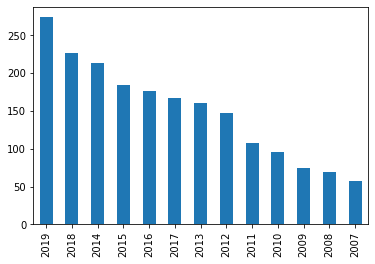

In [ ]:
data_sub['year'].value_counts().plot(kind='bar')
plt.show()

Số lượng xe được bán trên website giảm dần đều đối với các mẫu xe cũ và ngược lại.

### body_type:

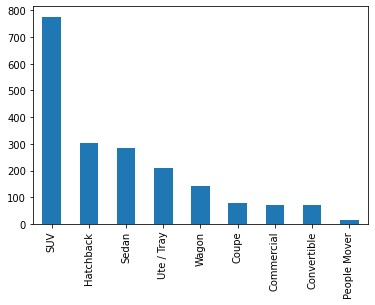

In [ ]:
data_sub['body_type_extracted'].value_counts().plot(kind='bar')
plt.show()

Dòng xe SUV (Sport Utility Vechile) được bán nhiều nhất trên website. Ít nhất là People Mover. People Mover là dòng xe nhiều chổ ngồi tương tự loại 16 chổ.

### make:

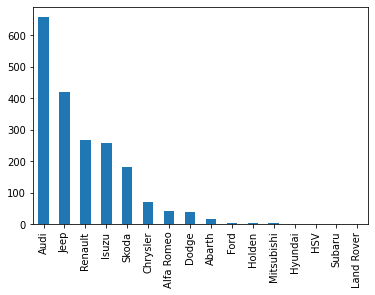

In [ ]:
data_sub['make'].value_counts().plot(kind='bar')
plt.show()

Audi, Jeep, Renault, Isuzu và Skoda là những hãng xe xuất hiện nhiều nhất trên website. Kế tiếp là các hãng xe thuộc tập đoàn FCA bao gồm Chrysler, Alfa, Dodge và Abarth.

### doors:

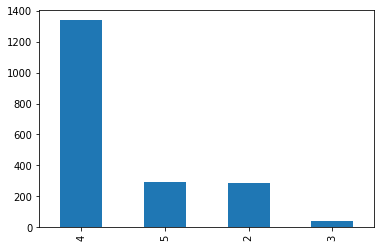

In [ ]:
data_sub['doors'].value_counts().plot(kind='bar')
plt.show()

Xe với 4 cửa ra vào chiếm đa số. Điều này phù hợp với phần phân tích `body_type`, khi mà SUV, Hatchback và Sedan là những dạng xe xuất hiện nhiều nhất trên website. Những dạng xe này thông thường có 4 cửa.

### transmission_type:

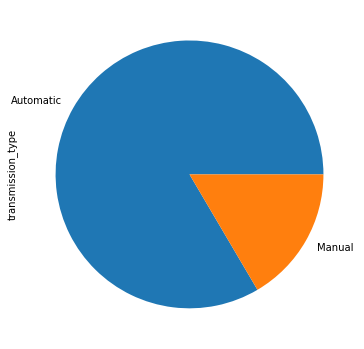

In [ ]:
data_sub['transmission_type'].value_counts().plot(kind='pie', figsize=(6,15))
plt.show()

Loại xe số tự động (automatic) chiếm hơn 80% trên website.

### drive_type:

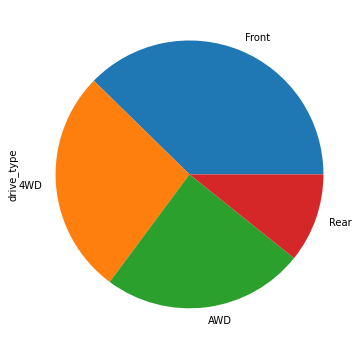

In [ ]:
data_sub['drive_type'].value_counts().plot(kind='pie', figsize=(6,15))
plt.show()

Front và 4WD (4 wheel-drive) chiếm đa số với gần 75%. Điều này khá hợp lý khi 4WD là `drive_type` phổ biến cho dòng xe cao cấp như SUV. Front phổ biến cho dòng xe phổ thông Sedan và Hatchback.

### engine_cc:

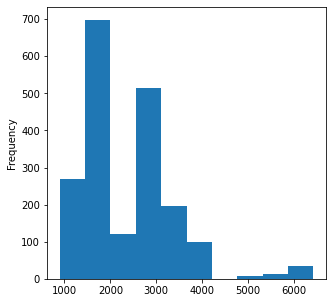

In [ ]:
data_sub['engine_cc'].plot(kind='hist', figsize=(5,5))
plt.show()

`engine_cc` tập trung vào 2 khoảng: 1000cc - 2000cc và 2750cc - 4000cc. Chúng ta cũng thấy một số giá trị bất thường trong khoảng từ 5000cc - 6000cc.

### cylinders:

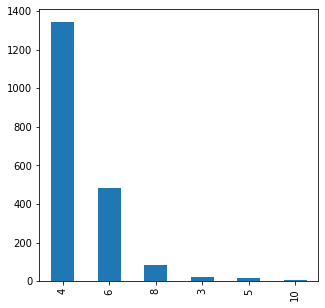

In [ ]:
data_sub['cylinders'].value_counts().plot(kind='bar', figsize=(5,5))
plt.show()

Các mẫu xe có 4 - 6 xi-lanh xuất hiện nhiều nhất. Đây cũng là số lượng xi-lanh phổ biến cho các dòng xe cá nhân. Xi-lanh nhiều thường áp dụng cho các mẫu xe tải, vốn là những mẫu ít xuất hiện trên website.

### fuel_type:

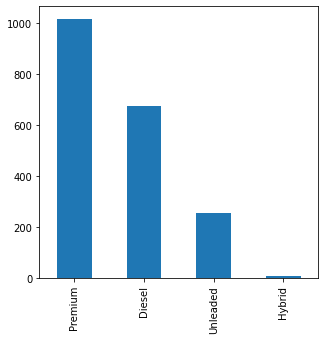

In [ ]:
data_sub['fuel_type'].value_counts().plot(kind='bar', figsize=(5,5))
plt.show()

Xăng (premium) và dầu (diesel) được sử dụng nhiều cho các dòng xe.

### fuel_consumption:

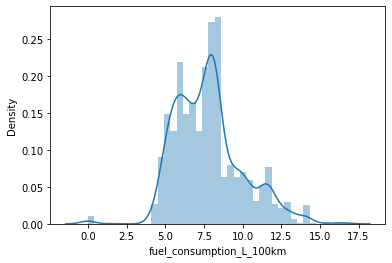

In [ ]:
sns.distplot(x=data_sub['fuel_consumption_L_100km'])
plt.show()

`fuel_consumption` tập trung trong khoảng từ 5 - 12.5 L/ 100 km và có phân phối lệch phải.

### co2_level:

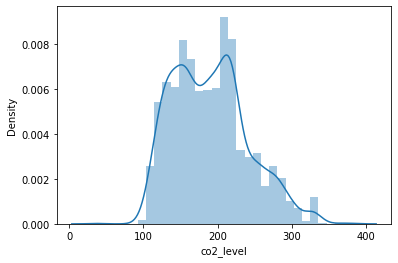

In [ ]:
sns.distplot(x=data_sub['co2_level'])
plt.show()

`co2_level` tập trung nhiều trong khoảng 100 - 300 g/km, mô hình có phân phối lệch phải.

### overal_height:

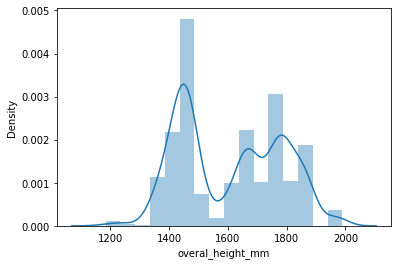

In [ ]:
sns.distplot(x=data_sub['overal_height_mm'])
plt.show()

Có thể thấy `over_height` chia ra làm 2 phân khúc: 1400 - 1500mm, 1600 - 1900mm.
Mỗi phân khúc này có phân phối xấp xỉ chuẩn. Ngoài ra, chúng ta cũng thấy giá trị bất thường ở khoảng 1950 - 2000mm.

### overal_lenght

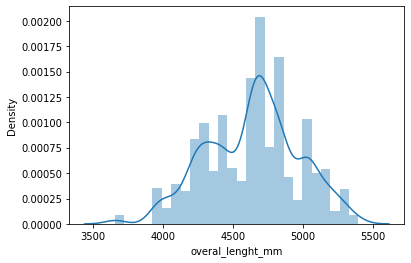

In [ ]:
sns.distplot(x=data_sub['overal_lenght_mm'])
plt.show()

`overal_lenght` tập trung trong khoảng từ 4000 - 5500mm. Mô hình có phân phối xấp xỉ chuẩn.

### overal_width:

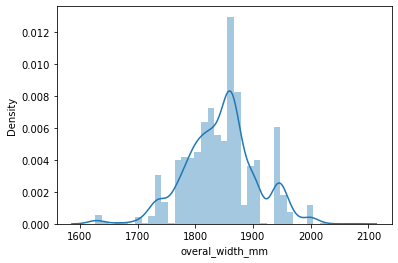

In [ ]:
sns.distplot(x=data_sub['overal_width_mm'])
plt.show()

`overal_width` tập trung trong khoảng 1700 - 2000mm. Mô hình có phân phối xấp xỉ chuẩn.

### wheelbase:

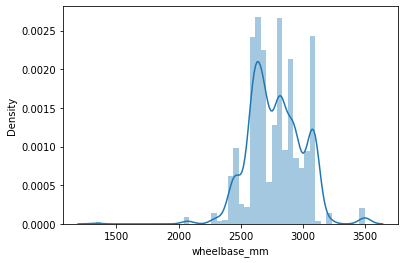

In [ ]:
sns.distplot(x=data_sub['wheelbase_mm'])
plt.show()

`wheelbase` tập trung trong khoảng 2250 - 3250mm. Mô hình có phân phối xấp xỉ chuẩn.

### seating_capacity:

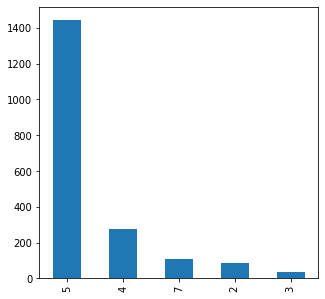

In [ ]:
data_sub['seating_capacity'].value_counts().plot(kind='bar', figsize=(5,5))
plt.show()

Xe có 5 chổ ngồi xuất hiện nhiều nhất trên website. Ít nhất là 3 chổ ngồi.

## Phân Tích Đa Biến:

### Biến Liên Tục & Biến Liên Tục:

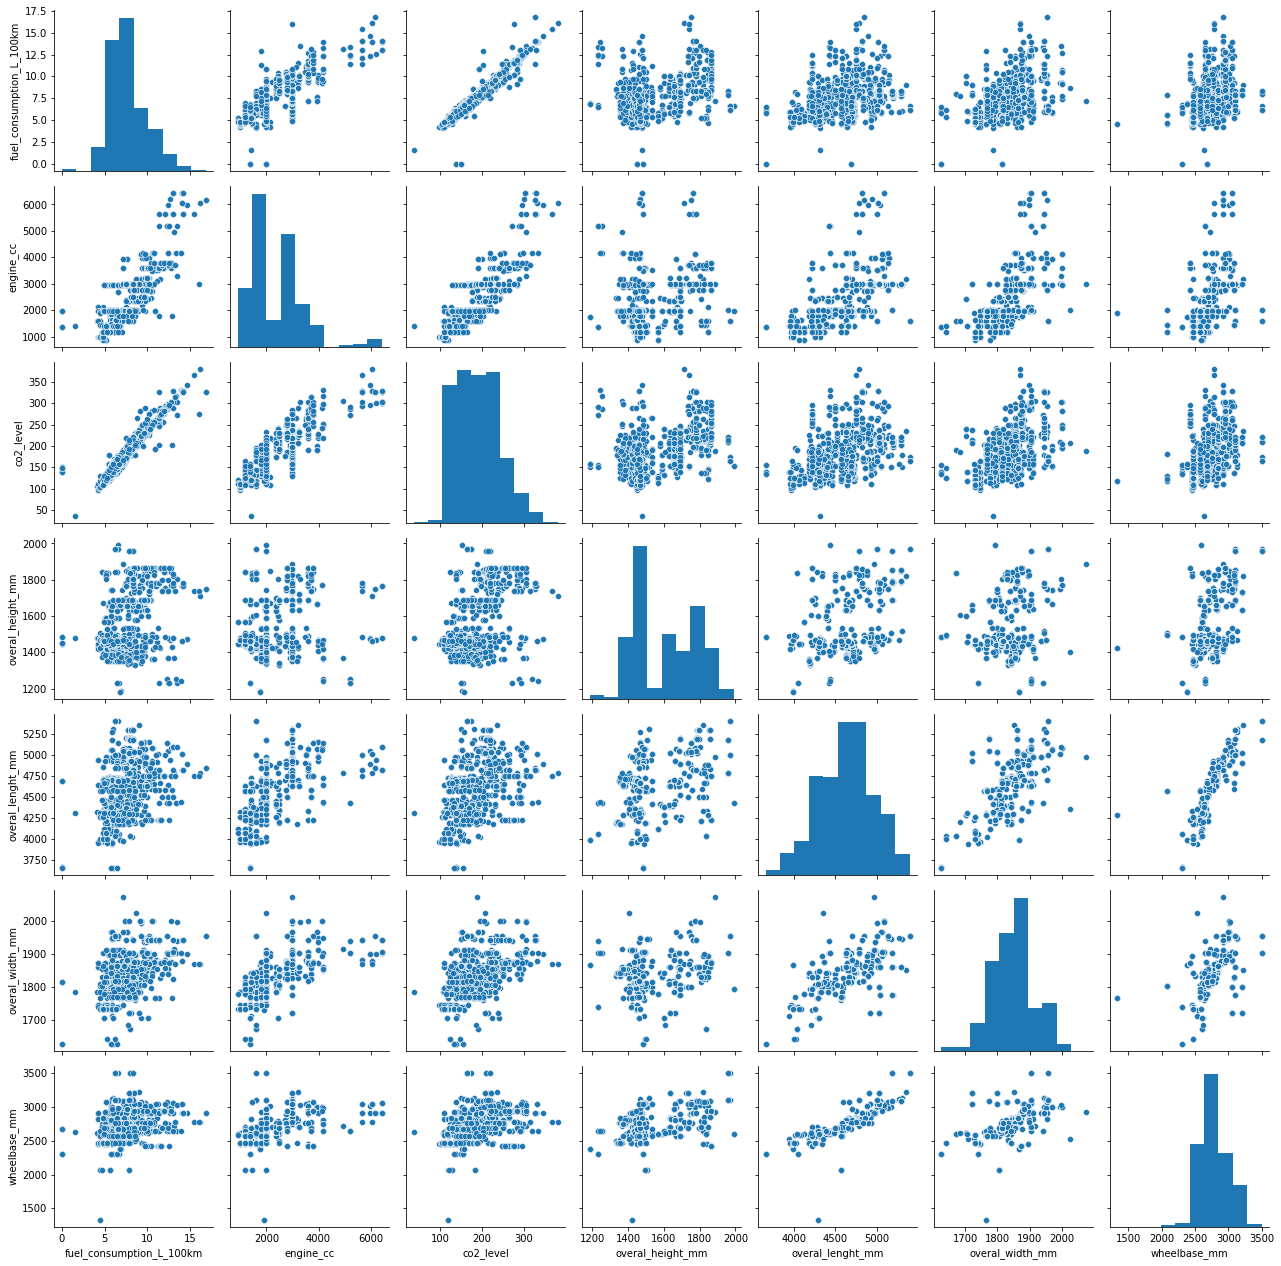

In [ ]:
sns.pairplot(data_sub[['fuel_consumption_L_100km', 'engine_cc', 'co2_level',
                       'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']])
plt.show()

In [ ]:
data_sub[['fuel_consumption_L_100km', 'engine_cc', 'co2_level',
                       'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']].corr()

,fuel_consumption_L_100km,engine_cc,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm
fuel_consumption_L_100km,1.000000,0.821779,0.947897,0.427975,0.287332,0.447317,0.250654
engine_cc,0.821779,1.000000,0.868079,0.384074,0.497286,0.587534,0.426623
co2_level,0.947897,0.868079,1.000000,0.543262,0.403575,0.509471,0.366797
overal_height_mm,0.427975,0.384074,0.543262,1.000000,0.405996,0.454502,0.476368
overal_lenght_mm,0.287332,0.497286,0.403575,0.405996,1.000000,0.635472,0.886834
overal_width_mm,0.447317,0.587534,0.509471,0.454502,0.635472,1.000000,0.572478
wheelbase_mm,0.250654,0.426623,0.366797,0.476368,0.886834,0.572478,1.000000


Từ biểu đồ và bảng Coorelation, ta thấy `fuel_consumption` có quan hệ tuyến tính thuận mạnh với `co2_level` và `engine_cc`. Chúng ta không thấy mối quan hệ rõ ràng giữa `fuel_consumption` và các thông số `overal_`, `wheelbase`.

Tuy nhiên, `overal_length` và `wheelbase` có quan hệ tuyến tính thuận mạnh. Điều này cũng dễ hiểu, khi chiều dài tổng thể và chiều dài trục xe gần như là một.

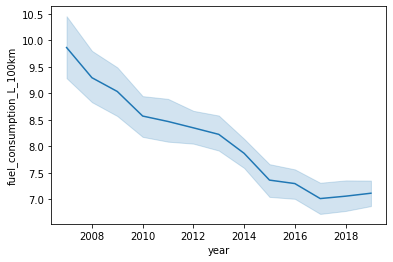

In [ ]:
sns.lineplot(x="year", y="fuel_consumption_L_100km", data=data_sub)
plt.show()

Các hãng xe có xu hướng giảm mức tiêu thụ nhiên liệu trên xe. Bằng chứng là qua các năm, mức tiêu thụ đã giảm đi rõ rệt.

### Biến Phân Loại & Biến Phân Loại:

#### Make và Body Type:

In [ ]:
table_FB1 = pd.crosstab(data_sub['make'], data_sub['body_type_extracted'])
table_FB1

body_type_extracted,Commercial,Convertible,Coupe,Hatchback,People Mover,SUV,Sedan,Ute / Tray,Wagon
make,,,,,,,,,
Abarth,0,7,0,8,0,0,0,0,0
Alfa Romeo,0,1,3,13,0,6,18,0,0
Audi,0,57,75,168,0,164,153,0,41
Chrysler,0,3,0,0,10,0,52,0,6
Dodge,0,0,0,7,6,24,0,0,0
Ford,0,0,1,0,0,0,0,1,0
HSV,0,0,0,0,0,0,1,0,0
Holden,0,0,0,0,0,0,1,1,0
Hyundai,0,0,0,1,0,0,0,0,0


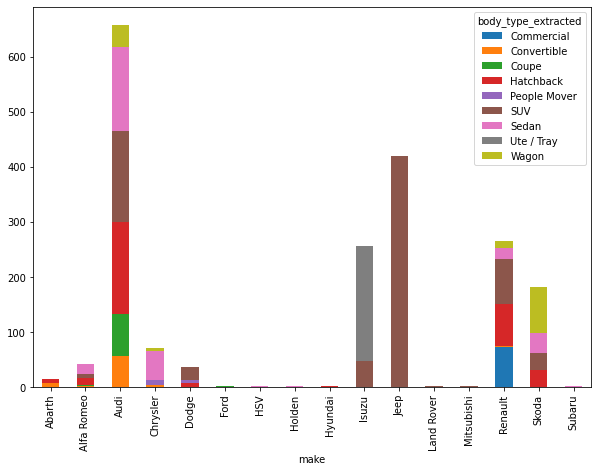

In [ ]:
table_FB1.plot(kind='bar', stacked=True, figsize=(10,7))
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
stat1, p1, dof1, expected1 = chi2_contingency(table_FB1)
prob1 = 0.95
critical1 = chi2.ppf(prob1, dof1)
print('prob=%.3f, crit=%.3f, stat=%.3f' % (prob1, critical1, stat1))
print('dof=%d' % dof1)
print('p=', p1)

prob=0.950, crit=146.567, stat=3933.775
dof=120
p= 0.0


Vì p < alpha, không thể bác bỏ giả thuyết H0: make và body_type có quan hệ với nhau.

#### Make và Tranmission Type:

In [ ]:
table_FB2 = pd.crosstab(data_sub['make'], data_sub['transmission_type'])
table_FB2

transmission_type,Automatic,Manual
make,,
Abarth,7,8
Alfa Romeo,33,8
Audi,627,31
Chrysler,70,1
Dodge,32,5
Ford,1,1
HSV,0,1
Holden,1,1
Hyundai,1,0


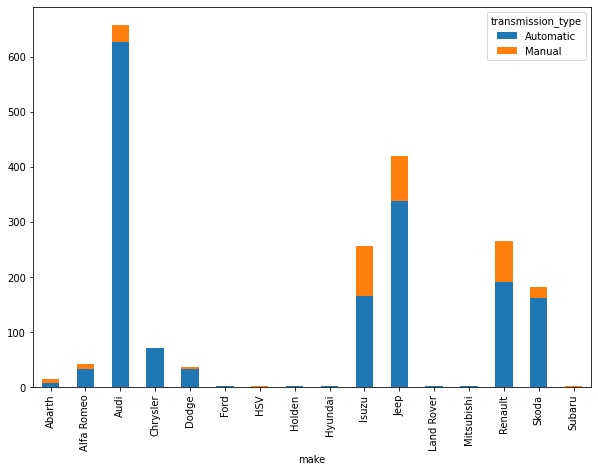

In [ ]:
table_FB2.plot(kind='bar', stacked=True, figsize=(10,7))
plt.show()

In [ ]:
stat2, p2, dof2, expected2 = chi2_contingency(table_FB2)
prob2 = 0.95
critical2 = chi2.ppf(prob2, dof2)
print('prob=%.3f, crit=%.3f, stat=%.3f' % (prob2, critical2, stat2))
print('dof=%d' % dof2)
print('p=', p2)

prob=0.950, crit=24.996, stat=207.233
dof=15
p= 7.176048988589082e-36


Vì p < alpha, không thể bác bỏ giả thuyết H0: make và transmission_type có quan hệ với nhau.

#### Make và Drive Type:

In [ ]:
table_FB3 = pd.crosstab(data_sub['make'], data_sub['drive_type'])
table_FB3

drive_type,4WD,AWD,Front,Rear
make,,,,
Abarth,0,0,12,3
Alfa Romeo,0,7,18,16
Audi,0,405,253,0
Chrysler,0,0,19,52
Dodge,13,0,24,0
Ford,1,0,0,1
HSV,0,0,0,1
Holden,0,0,0,2
Hyundai,0,0,1,0


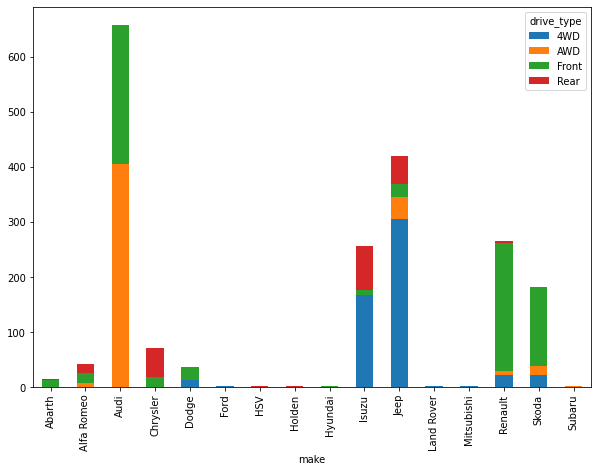

In [ ]:
table_FB3.plot(kind='bar', stacked=True, figsize=(10,7))
plt.show()

In [ ]:
stat3, p3, dof3, expected3 = chi2_contingency(table_FB3)
prob3 = 0.95
critical3 = chi2.ppf(prob3, dof3)
print('prob=%.3f, crit=%.3f, stat=%.3f' % (prob3, critical3, stat3))
print('dof=%d' % dof3)
print('p=', p3)

prob=0.950, crit=61.656, stat=2297.721
dof=45
p= 0.0


Vì p < alpha, không thể bác bỏ giả thuyết H0: make và drive_type có quan hệ với nhau.

#### Make và Fuel Type:

In [ ]:
table_FB4 = pd.crosstab(data_sub['make'], data_sub['fuel_type'])
table_FB4

fuel_type,Diesel,Hybrid,Premium,Unleaded
make,,,,
Abarth,0,0,5,10
Alfa Romeo,7,0,34,0
Audi,179,9,470,0
Chrysler,16,0,43,12
Dodge,7,0,16,14
Ford,1,0,1,0
HSV,0,0,1,0
Holden,0,0,1,1
Hyundai,0,0,0,1


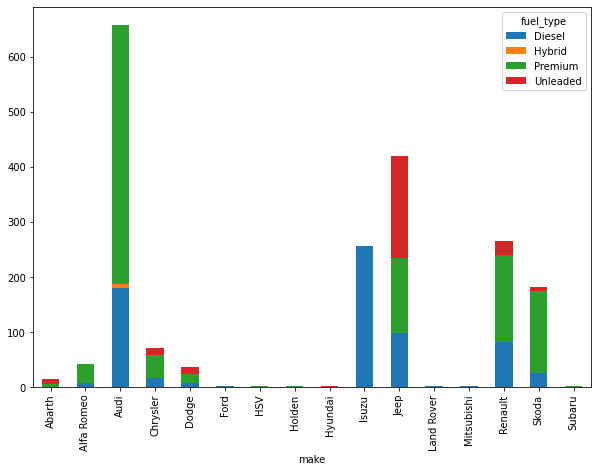

In [ ]:
table_FB4.plot(kind='bar', stacked=True, figsize=(10,7))
plt.show()

In [ ]:
stat4, p4, dof4, expected4 = chi2_contingency(table_FB4)
prob4 = 0.95
critical4 = chi2.ppf(prob4, dof4)
print('prob=%.3f, crit=%.3f, stat=%.3f' % (prob4, critical4, stat4))
print('dof=%d' % dof4)
print('p=', p4)

prob=0.950, crit=61.656, stat=1168.310
dof=45
p= 2.6558291628596676e-215


Vì p < alpha, không thể bác bỏ giả thuyết H0: make và fuel_type có quan hệ với nhau.

**Như vậy**: Không thể bác bỏ giả thuyết make có quan hệ với body_type_extracted, transmission_type, drive_type, fuel_type. Và vì 4 cột còn lại đều có quan hệ với make, chúng ta có tính chất bắt cầu là body_type_extracted, transmission_type, drive_type, fuel_type cũng có quan hệ với nhau.

### Biến Phân Loại Và Biến Liên Tục:

#### Fuel Consumption và Make:

In [ ]:
df_sub1 = data_sub[['fuel_consumption_L_100km', 'make']]
df_sub1.head()

,fuel_consumption_L_100km,make
0,5.8,Abarth
1,6.0,Abarth
2,6.5,Abarth
3,5.8,Abarth
4,0.0,Abarth


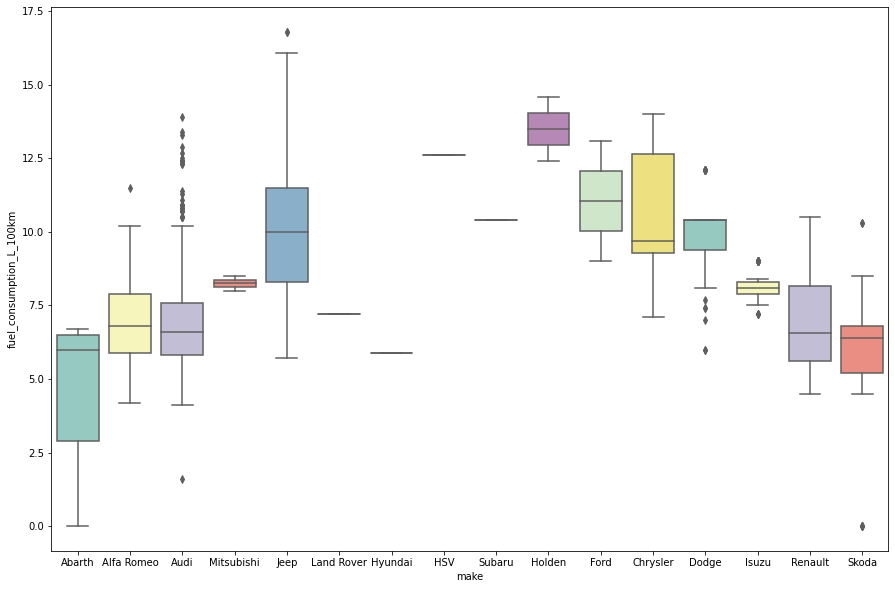

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='make', y='fuel_consumption_L_100km', data=df_sub1, palette='Set3')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model1 = ols("fuel_consumption_L_100km ~ C(make)", data=df_sub1).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
anova_table1

,sum_sq,df,F,PR(>F)
C(make),4182.833561,15.0,104.244865,8.325484e-236
Residual,5184.160364,1938.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: make ảnh hưởng đến fuel_consumption

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
m_comp1 = pairwise_tukeyhsd(endog=df_sub1['fuel_consumption_L_100km'], groups=df_sub1['make'], alpha=0.05)
print(m_comp1)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
    Abarth Alfa Romeo   2.3063  0.001   0.6131  3.9995   True
    Abarth       Audi   2.2968  0.001   0.8316   3.762   True
    Abarth   Chrysler   5.9107  0.001   4.3162  7.5052   True
    Abarth      Dodge   5.4627  0.001   3.7452  7.1802   True
    Abarth       Ford     6.51  0.001   2.2861 10.7339   True
    Abarth        HSV     8.06  0.001   2.2648 13.8552   True
    Abarth     Holden     8.96  0.001   4.7361 13.1839   True
    Abarth    Hyundai     1.36    0.9  -4.4352  7.1552  False
    Abarth      Isuzu   3.5737  0.001    2.083  5.0643   True
    Abarth       Jeep   5.3278  0.001   3.8533  6.8023   True
    Abarth Land Rover     2.66    0.9  -3.1352  8.4552  False
    Abarth Mitsubishi     3.71 0.1645  -0.5139  7.9339  False
    Abarth    Renault   2.3961  0.001    0.907  3.8852   True
    Abar

Các kết quả từ Tukey HSD cho thấy các cặp có reject=False: chấp nhận H0.

#### Fuel Consumption và Body Type:

In [ ]:
df_sub2 = data_sub[['fuel_consumption_L_100km', 'body_type_extracted']]
df_sub2.head()

,fuel_consumption_L_100km,body_type_extracted
0,5.8,Convertible
1,6.0,Convertible
2,6.5,Convertible
3,5.8,Hatchback
4,0.0,Convertible


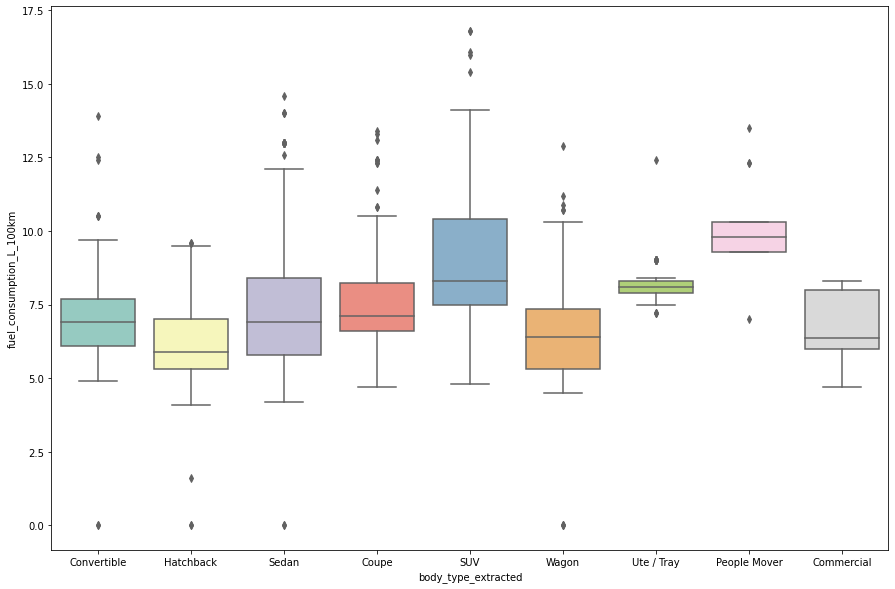

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='body_type_extracted', y='fuel_consumption_L_100km', data=df_sub2, palette='Set3')
plt.show()

In [ ]:
model2 = ols("fuel_consumption_L_100km ~ C(body_type_extracted)", data=df_sub2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
C(body_type_extracted),2164.673659,8.0,73.071769,1.971226e-105
Residual,7202.320266,1945.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: body_type_extracted ảnh hưởng đến fuel_consumption.

In [ ]:
m_comp2 = pairwise_tukeyhsd(endog=df_sub2['fuel_consumption_L_100km'], groups=df_sub2['body_type_extracted'], alpha=0.05)
print(m_comp2)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
  Commercial  Convertible   0.3461    0.9 -0.6533  1.3456  False
  Commercial        Coupe   1.1793 0.0054  0.2057  2.1529   True
  Commercial    Hatchback  -0.5241 0.4895 -1.3073  0.2591  False
  Commercial People Mover   3.4299  0.001  1.7783  5.0814   True
  Commercial          SUV   2.1476  0.001  1.4114  2.8837   True
  Commercial        Sedan    0.724 0.1018 -0.0648  1.5127  False
  Commercial   Ute / Tray   1.4508  0.001  0.6347  2.2668   True
  Commercial        Wagon  -0.1701    0.9 -1.0336  0.6934  False
 Convertible        Coupe   0.8332  0.168  -0.144  1.8103  False
 Convertible    Hatchback  -0.8702 0.0178 -1.6579 -0.0826   True
 Convertible People Mover   3.0837  0.001  1.4301  4.7374   True
 Convertible          SUV   1.8014  0.001  1.0605  2.5423   True
 Convertible        Sedan

Các kết quả từ Tukey HSD cho thấy các cặp có reject=False: chấp nhận H0.

#### Fuel Consumption và Transmission Type:

In [ ]:
df_sub3 = data_sub[['fuel_consumption_L_100km', 'transmission_type']]
df_sub3.head()

,fuel_consumption_L_100km,transmission_type
0,5.8,Automatic
1,6.0,Manual
2,6.5,Manual
3,5.8,Automatic
4,0.0,Automatic


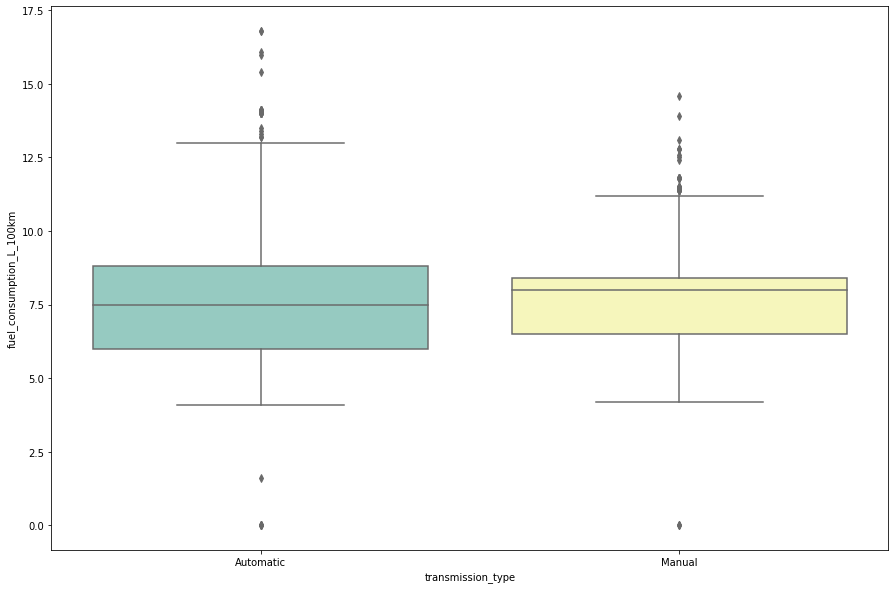

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='transmission_type', y='fuel_consumption_L_100km', data=df_sub3, palette='Set3')
plt.show()

In [ ]:
model3 = ols("fuel_consumption_L_100km ~ C(transmission_type)", data=df_sub3).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
anova_table3

,sum_sq,df,F,PR(>F)
C(transmission_type),12.538445,1.0,2.616405,0.105925
Residual,9354.455481,1952.0,NaN,NaN


Vì p > alpha, bác bỏ giả thuyết H0: transmission_type có ảnh hưởng đến fuel_consumption.

#### Fuel Consumption và Drive Type:

In [ ]:
df_sub4 = data_sub[['fuel_consumption_L_100km', 'drive_type']]
df_sub4.head()

,fuel_consumption_L_100km,drive_type
0,5.8,Front
1,6.0,Front
2,6.5,Rear
3,5.8,Front
4,0.0,Front


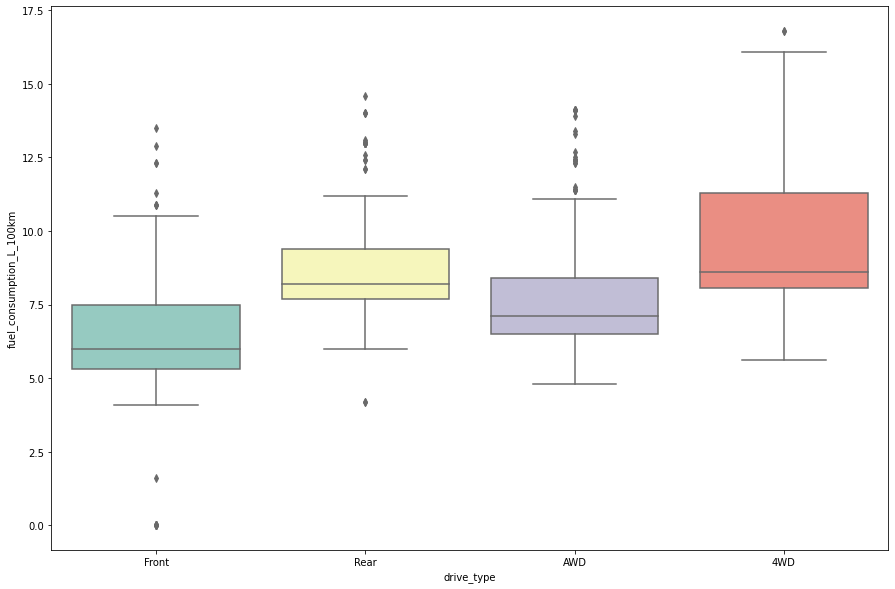

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='drive_type', y='fuel_consumption_L_100km', data=df_sub4, palette='Set3')
plt.show()

In [ ]:
model4 = ols("fuel_consumption_L_100km ~ C(drive_type)", data=df_sub4).fit()
anova_table4 = sm.stats.anova_lm(model4, typ=2)
anova_table4

,sum_sq,df,F,PR(>F)
C(drive_type),2905.982735,3.0,292.351882,1.062216e-156
Residual,6461.011190,1950.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: drive_type có ảnh hưởng đến fuel_consumption.

In [ ]:
m_comp4 = pairwise_tukeyhsd(endog=df_sub4['fuel_consumption_L_100km'], groups=df_sub4['drive_type'], alpha=0.05)
print(m_comp4)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   4WD    AWD  -1.7181 0.001 -2.0133 -1.4228   True
   4WD  Front  -2.9549 0.001 -3.2214 -2.6884   True
   4WD   Rear  -0.6516 0.001 -1.0331   -0.27   True
   AWD  Front  -1.2368 0.001 -1.5119 -0.9617   True
   AWD   Rear   1.0665 0.001  0.6789  1.4541   True
 Front   Rear   2.3033 0.001  1.9371  2.6695   True
---------------------------------------------------


Các kết quả từ Tukey HSD cho thấy các cặp có reject=True: bác bỏ H0.

#### Fuel Consumption và Fuel Type:

In [ ]:
df_sub5 = data_sub[['fuel_consumption_L_100km', 'fuel_type']]
df_sub5.head()

,fuel_consumption_L_100km,fuel_type
0,5.8,Unleaded
1,6.0,Unleaded
2,6.5,Premium
3,5.8,Unleaded
4,0.0,Unleaded


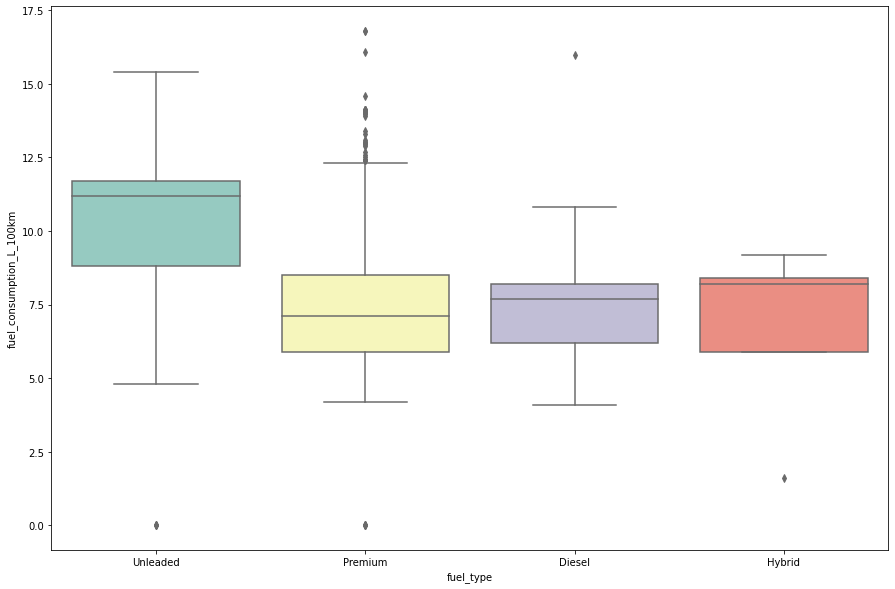

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='fuel_type', y='fuel_consumption_L_100km', data=df_sub5, palette='Set3')
plt.show()

In [ ]:
model5 = ols("fuel_consumption_L_100km ~ C(fuel_type)", data=df_sub5).fit()
anova_table5 = sm.stats.anova_lm(model5, typ=2)
anova_table5

,sum_sq,df,F,PR(>F)
C(fuel_type),1451.322457,3.0,119.176194,7.223521e-71
Residual,7915.671468,1950.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: fuel_type có ảnh hưởng đến fuel_consumption.

In [ ]:
m_comp5 = pairwise_tukeyhsd(endog=df_sub5['fuel_consumption_L_100km'], groups=df_sub5['fuel_type'], alpha=0.05)
print(m_comp5)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
 Diesel   Hybrid  -0.3801    0.9 -2.1184 1.3583  False
 Diesel  Premium    0.199 0.1926 -0.0583 0.4564  False
 Diesel Unleaded   2.6593  0.001  2.2784 3.0402   True
 Hybrid  Premium   0.5791 0.8033 -1.1554 2.3136  False
 Hybrid Unleaded   3.0393  0.001  1.2823 4.7964   True
Premium Unleaded   2.4603  0.001  2.0974 2.8231   True
------------------------------------------------------


Các kết quả từ Tukey HSD cho thấy các cặp có reject=False: chấp nhận H0.

#### Fuel Consumption và Doors:

In [ ]:
df_sub6 = data_sub[['fuel_consumption_L_100km', 'doors']]
df_sub6.head()

,fuel_consumption_L_100km,doors
0,5.8,2
1,6.0,2
2,6.5,2
3,5.8,3
4,0.0,2


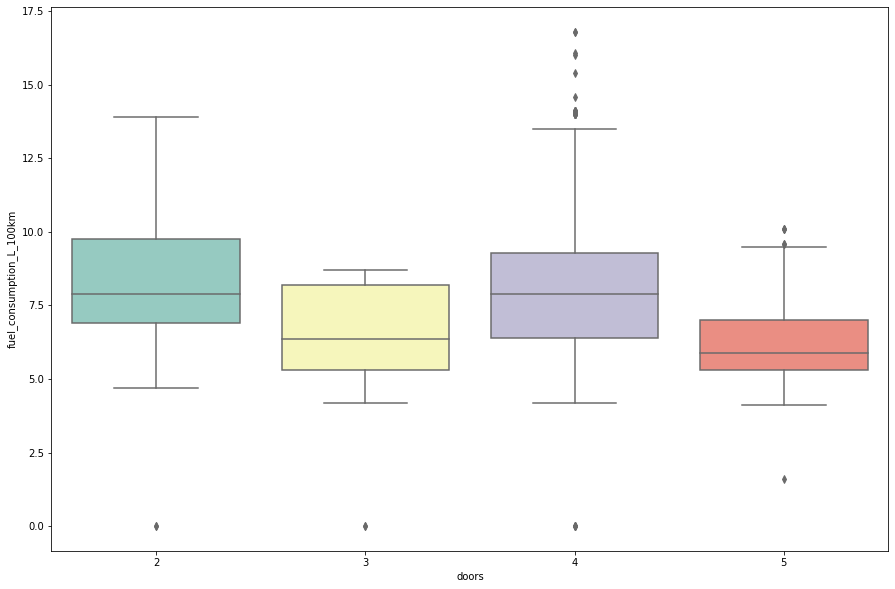

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='doors', y='fuel_consumption_L_100km', data=df_sub6, palette='Set3')
plt.show()

In [ ]:
model6 = ols("fuel_consumption_L_100km ~ C(doors)", data=df_sub6).fit()
anova_table6 = sm.stats.anova_lm(model6, typ=2)
anova_table6

,sum_sq,df,F,PR(>F)
C(doors),956.273413,3.0,73.903029,2.855604e-45
Residual,8410.720512,1950.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: doors có ảnh hưởng đến fuel_consumption.

In [ ]:
m_comp6 = pairwise_tukeyhsd(endog=df_sub6['fuel_consumption_L_100km'], groups=df_sub6['doors'], alpha=0.05)
print(m_comp6)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     2      3  -2.0649  0.001 -2.9668 -1.1631   True
     2      4  -0.3119 0.0986 -0.6608   0.037  False
     2      5  -2.0996  0.001 -2.5443  -1.655   True
     3      4    1.753  0.001  0.8961  2.6099   True
     3      5  -0.0347    0.9 -0.9348  0.8654  False
     4      5  -1.7877  0.001 -2.1322 -1.4433   True
----------------------------------------------------


Các kết quả từ Tukey HSD cho thấy các cặp có reject=False: chấp nhận H0.

#### Fuel Consumption và seating_capacity:

In [ ]:
df_sub7 = data_sub[['fuel_consumption_L_100km', 'seating_capacity']]
df_sub7.head()

,fuel_consumption_L_100km,seating_capacity
0,5.8,4
1,6.0,4
2,6.5,2
3,5.8,4
4,0.0,4


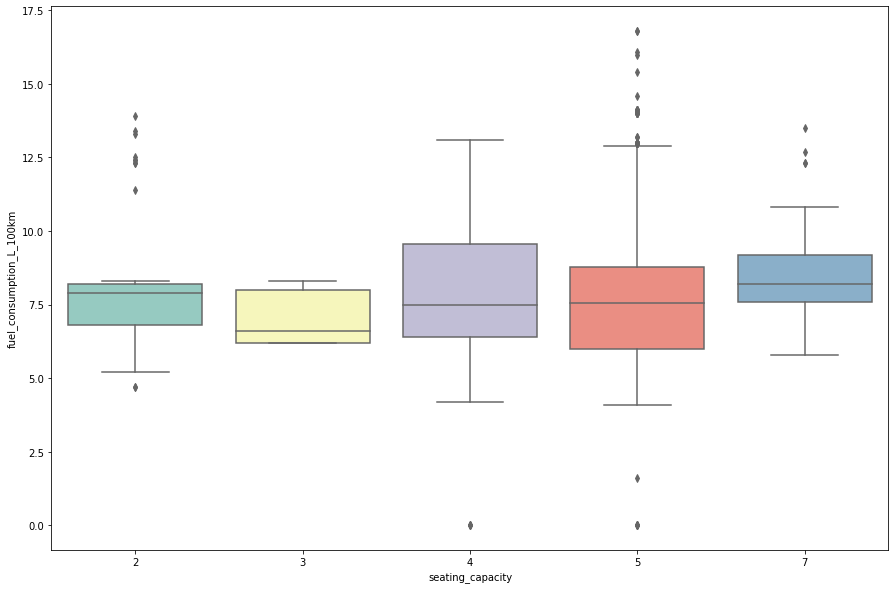

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='seating_capacity', y='fuel_consumption_L_100km', data=df_sub7, palette='Set3')
plt.show()

In [ ]:
model7 = ols("fuel_consumption_L_100km ~ C(seating_capacity)", data=df_sub7).fit()
anova_table7 = sm.stats.anova_lm(model7, typ=2)
anova_table7

,sum_sq,df,F,PR(>F)
C(seating_capacity),69.961706,4.0,3.666637,0.00556
Residual,9297.032219,1949.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: seating_capacity có ảnh hưởng đến fuel_consumption.

In [ ]:
m_comp7 = pairwise_tukeyhsd(endog=df_sub7['fuel_consumption_L_100km'], groups=df_sub7['seating_capacity'], alpha=0.05)
print(m_comp7)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     2      3  -0.8782 0.2556  -2.064 0.3076  False
     2      4    0.048    0.9 -0.6911 0.7871  False
     2      5  -0.0887    0.9 -0.7542 0.5769  False
     2      7    0.558 0.3955 -0.3049 1.4209  False
     3      4   0.9263 0.1174   -0.13 1.9825  False
     3      5   0.7896 0.2025 -0.2166 1.7957  False
     3      7   1.4362 0.0057  0.2899 2.5825   True
     4      5  -0.1367 0.8629 -0.5272 0.2538  False
     4      7     0.51 0.2353 -0.1639 1.1839  False
     5      7   0.6467 0.0243  0.0544  1.239   True
---------------------------------------------------


Các kết quả từ Tukey HSD cho thấy các cặp có reject=False: chấp nhận H0.

#### Fuel Consumption và cylinders:

In [ ]:
df_sub8 = data_sub[['fuel_consumption_L_100km', 'cylinders']]
df_sub8.head()

,fuel_consumption_L_100km,cylinders
0,5.8,4
1,6.0,4
2,6.5,4
3,5.8,4
4,0.0,4


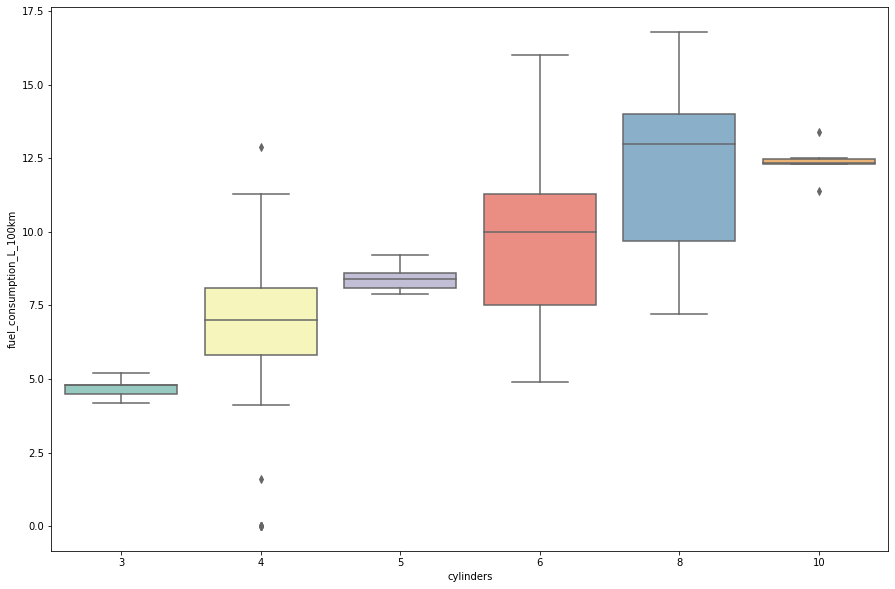

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='cylinders', y='fuel_consumption_L_100km', data=df_sub8, palette='Set3')
plt.show()

In [ ]:
model8 = ols("fuel_consumption_L_100km ~ C(cylinders)", data=df_sub8).fit()
anova_table8 = sm.stats.anova_lm(model8, typ=2)
anova_table8

,sum_sq,df,F,PR(>F)
C(cylinders),4131.467650,5.0,307.441833,5.706666e-243
Residual,5235.526275,1948.0,NaN,NaN


Vì p < alpha, không thể bác bỏ H0: cylinders có ảnh hưởng đến fuel_consumption.

In [ ]:
m_comp8 = pairwise_tukeyhsd(endog=df_sub8['fuel_consumption_L_100km'], groups=df_sub8['cylinders'], alpha=0.05)
print(m_comp8)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      4   2.2311  0.001  1.2477 3.2145   True
     3      5    3.665  0.001  2.1692 5.1607   True
     3      6   4.7213  0.001  3.7233 5.7194   True
     3      8   7.3501  0.001  6.2481  8.452   True
     3     10   7.6659  0.001  5.5222 9.8097   True
     4      5   1.4338 0.0047  0.2925 2.5752   True
     4      6   2.4902  0.001  2.2421 2.7383   True
     4      8    5.119  0.001    4.59 5.6479   True
     4     10   5.4348  0.001  3.5214 7.3482   True
     5      6   1.0564 0.0948 -0.0976 2.2104  False
     5      8   3.6851  0.001  2.4402 4.9301   True
     5     10    4.001  0.001  1.7803 6.2216   True
     6      8   2.6288  0.001  2.0731 3.1844   True
     6     10   2.9446  0.001  1.0237 4.8656   True
     8     10   0.3159    0.9 -1.6611 2.2928  False
---------------------------------------------------


Các kết quả từ Tukey HSD cho thấy các cặp có reject=False: chấp nhận H0.

**Như vậy:** make, body_type, drive_type, fuel_type, doors, seating_capacity, cylinders có ảnh hưởng đến fuel_consumption.

## Xử Lý Dữ Liệu Ngoại Lệ:

In [ ]:
from scipy.stats import iqr

In [ ]:
def get_num_of_outliers(data, series):
    Q1 = np.percentile(data[series], 25)
    Q3 = np.percentile(data[series], 75)
    IQR = iqr(data[series])
    n_o_upper = data[data[series] > (Q3 + 1.5*IQR)].shape[0]
    n_o_lower = data[data[series] < (Q1 - 1.5*IQR)].shape[0]
    total_outlier = n_o_upper + n_o_lower
    return total_outlier

In [ ]:
data_sub.reset_index(drop=True, inplace=True)

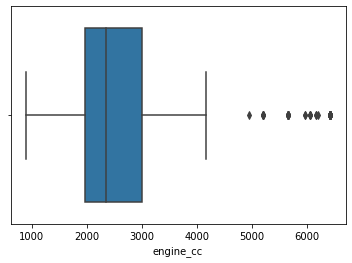

In [ ]:
sns.boxplot(x=data_sub['engine_cc'])
plt.show()

In [ ]:
engine_cc_outlier = get_num_of_outliers(data_sub, 'engine_cc')
engine_cc_outlier

54

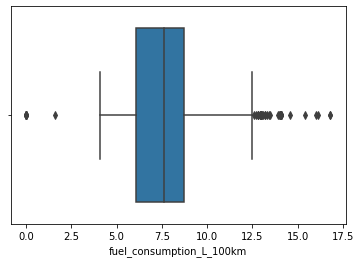

In [ ]:
sns.boxplot(x=data_sub['fuel_consumption_L_100km'])
plt.show()

In [ ]:
fuel_consumption_L_100km_outlier = get_num_of_outliers(data_sub, 'fuel_consumption_L_100km')
fuel_consumption_L_100km_outlier

68

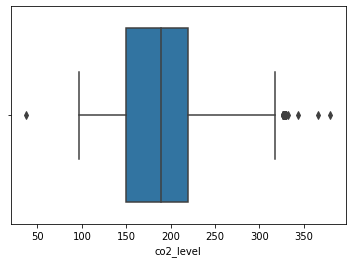

In [ ]:
sns.boxplot(x=data_sub['co2_level'])
plt.show()

In [ ]:
data_sub[data_sub['engine_cc'] >= 5000]

,make,body_type_extracted,doors,seating_capacity,transmission_type,drive_type,engine_cc,cylinders,fuel_type,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm,year
81,Audi,Coupe,2,2,Automatic,AWD,5204.0,10,Premium,13.4,272,1230,4425,1940,2650,2019
101,Audi,Convertible,2,2,Automatic,AWD,5204.0,10,Premium,12.4,292,1230,4426,1904,2650,2019
133,Audi,Coupe,2,2,Automatic,AWD,5204.0,10,Premium,12.3,287,1252,4431,1904,2650,2019
134,Audi,Coupe,2,2,Automatic,AWD,5204.0,10,Premium,12.3,287,1252,4431,1904,2650,2019
138,Audi,Coupe,2,2,Automatic,AWD,5204.0,10,Premium,11.4,272,1230,4425,1940,2650,2019
140,Audi,Convertible,2,2,Automatic,AWD,5204.0,10,Premium,12.5,292,1230,4426,1904,2650,2019
456,HSV,Sedan,4,5,Manual,Rear,6200.0,8,Premium,12.6,300,1467,4943,1899,2915,2014
458,Holden,Ute / Tray,2,2,Automatic,Rear,5967.0,8,Unleaded,12.4,296,1480,5040,1899,3009,2013
461,Holden,Sedan,4,5,Manual,Rear,5967.0,8,Premium,14.6,344,1476,4894,1899,2915,2011
726,Chrysler,Sedan,4,5,Automatic,Rear,6417.0,8,Premium,13.0,303,1478,5089,1902,3052,2019


Có thể thấy, outliers của engince_cc có liên quan đến outliers của co2_level và fuel_consumption_L_100km. engine_cc càng lớn, thì 2 biến còn lại cũng tăng. Như vậy, theo tôi những outliers này không phải lỗi nhập liệu mà nó phản ánh bản chất của những mẫu xe này.

In [ ]:
co2_level_outlier = get_num_of_outliers(data_sub, 'co2_level')
co2_level_outlier

30

In [ ]:
outliers_pct = (engine_cc_outlier + fuel_consumption_L_100km_outlier + co2_level_outlier)/data_sub.shape[0]*100
outliers_pct

7.778915046059365

Vì ngoại lệ chỉ chiếm khoảng 8%, nên tôi sẽ loại bỏ những ngoại lệ này.

In [ ]:
Q11 = np.percentile(data_sub['engine_cc'], 25)
Q31 = np.percentile(data_sub['engine_cc'], 75)
IQR1 = iqr(data_sub['engine_cc'])

df_outlier1 = data_sub[(data_sub['engine_cc'] < (Q11 - 1.5*IQR1)) | (data_sub['engine_cc'] > (Q31 + 1.5*IQR1))]

In [ ]:
Q12 = np.percentile(data_sub['fuel_consumption_L_100km'], 25)
Q32 = np.percentile(data_sub['fuel_consumption_L_100km'], 75)
IQR2 = iqr(data_sub['fuel_consumption_L_100km'])

df_outlier2 = data_sub[(data_sub['fuel_consumption_L_100km'] < (Q12 - 1.5*IQR2)) | (data_sub['fuel_consumption_L_100km'] > (Q32 + 1.5*IQR2))]

In [ ]:
Q13 = np.percentile(data_sub['co2_level'], 25)
Q33 = np.percentile(data_sub['co2_level'], 75)
IQR3 = iqr(data_sub['co2_level'])

df_outlier3 = data_sub[(data_sub['co2_level'] < (Q13 - 1.5*IQR3)) | (data_sub['co2_level'] > (Q33 + 1.5*IQR3))]

In [ ]:
outliers_idx = df_outlier1.index.tolist() + df_outlier2.index.tolist() + df_outlier3.index.tolist()

In [ ]:
print('Before: {}'.format(len(outliers_idx)))
outliers_idx = list(dict.fromkeys(outliers_idx))
print('After: {}'.format(len(outliers_idx)))

Before: 152
After: 77


In [ ]:
data_sub.shape[0]

1954

Như vậy, tổng số ngoại lệ theo index còn ít hơn, chỉ chiếm khoảng 4% tổng dữ liệu.

In [ ]:
print('Before: {}'.format(data_sub.shape[0]))
data_sub.drop(axis=0, index=outliers_idx, inplace=True)
print('After: {}'.format(data_sub.shape[0]))

Before: 1954
After: 1877


/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


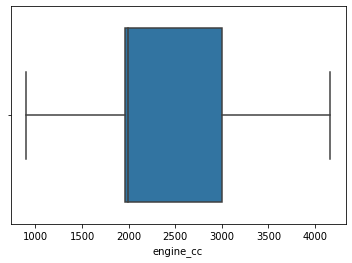

In [ ]:
sns.boxplot(x=data_sub['engine_cc'])
plt.show()

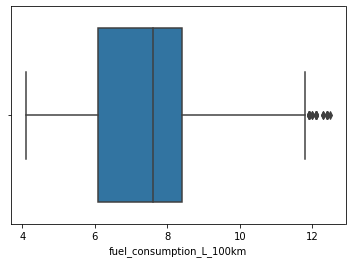

In [ ]:
sns.boxplot(x=data_sub['fuel_consumption_L_100km'])
plt.show()

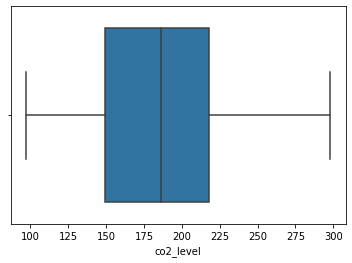

In [ ]:
sns.boxplot(x=data_sub['co2_level'])
plt.show()

## Feature Engineering:

### Chuẩn Hoá Dữ Liệu:

Chúng ta có một số cột không tuân theo phân phối chuẩn như: fuel_consumption, co2_level. Chúng ta cũng đã loại bỏ outliers, vì vậy MinMaxScaler là sự lựa chọn phù hợp nhất lúc này.

In [ ]:
data_sub.reset_index(drop=True, inplace=True)

In [ ]:
data_scaled = data_sub[['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']]

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.MinMaxScaler()

In [ ]:
data_scaled.head()

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm
0,1368.0,5.8,134,1485,3657,1627,2300
1,1368.0,6.0,139,1485,3657,1627,2300
2,1368.0,6.5,150,1233,4054,1740,2310
3,1368.0,5.8,134,1485,3657,1627,2300
4,1368.0,6.7,155,1233,4054,1740,2310


In [ ]:
data_sub_scaled = scaler.fit_transform(data_sub[['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']])

In [ ]:
data_sub_scaled = pd.DataFrame(data_sub_scaled, columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm'])

In [ ]:
data_sub_scaled.head()

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm
0,0.143951,0.202381,0.184080,0.373449,0.000000,0.000000,0.446140
1,0.143951,0.226190,0.208955,0.373449,0.000000,0.000000,0.446140
2,0.143951,0.285714,0.263682,0.060794,0.227899,0.253363,0.450763
3,0.143951,0.202381,0.184080,0.373449,0.000000,0.000000,0.446140
4,0.143951,0.309524,0.288557,0.060794,0.227899,0.253363,0.450763


### Tạo Thuộc Tính:

In [ ]:
data_sub[['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year']].head()

,make,body_type_extracted,doors,seating_capacity,transmission_type,drive_type,cylinders,fuel_type,year
0,Abarth,Convertible,2,4,Automatic,Front,4,Unleaded,2019
1,Abarth,Convertible,2,4,Manual,Front,4,Unleaded,2019
2,Abarth,Convertible,2,2,Manual,Rear,4,Premium,2019
3,Abarth,Hatchback,3,4,Automatic,Front,4,Unleaded,2019
4,Abarth,Convertible,2,2,Automatic,Rear,4,Premium,2019


In [ ]:
data_sub_encoded = pd.get_dummies(data_sub, columns=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'],
                                  prefix=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'])

Với n category thì chúng ta chỉ cần n-1 cột dummies. Chi tiết phần giải thích ở [đây](https://expertsteaching.com/dummy-variable-and-dummy-variable-trap/)

Do đó, tôi sẽ loại bỏ những cột không cần thiết và thêm cột `year_2007` để tránh hiện tượng DUMMY VARIABLE TRAP.

In [ ]:
data_sub_encoded = data_sub_encoded.drop(columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level',
                                                  'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm',
                                                  'wheelbase_mm', 'year_2007'])

In [ ]:
data_sub_encoded.head()

,make_Abarth,make_Alfa Romeo,make_Audi,make_Chrysler,make_Dodge,make_Ford,make_Hyundai,make_Isuzu,make_Jeep,make_Land Rover,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_sub_encoded.columns

Index(['make_Abarth', 'make_Alfa Romeo', 'make_Audi', 'make_Chrysler',
       'make_Dodge', 'make_Ford', 'make_Hyundai', 'make_Isuzu', 'make_Jeep',
       'make_Land Rover', 'make_Mitsubishi', 'make_Renault', 'make_Skoda',
       'make_Subaru', 'body_type_extracted_Commercial',
       'body_type_extracted_Convertible', 'body_type_extracted_Coupe',
       'body_type_extracted_Hatchback', 'body_type_extracted_People Mover',
       'body_type_extracted_SUV', 'body_type_extracted_Sedan',
       'body_type_extracted_Ute / Tray', 'body_type_extracted_Wagon',
       'doors_2', 'doors_3', 'doors_4', 'doors_5', 'seating_capacity_2',
       'seating_capacity_3', 'seating_capacity_4', 'seating_capacity_5',
       'seating_capacity_7', 'transmission_type_Automatic',
       'transmission_type_Manual', 'drive_type_4WD', 'drive_type_AWD',
       'drive_type_Front', 'drive_type_Rear', 'cylinders_3', 'cylinders_4',
       'cylinders_5', 'cylinders_6', 'cylinders_8', 'fuel_type_Diesel',
       'fuel_typ

In [ ]:
data_sub_scaled.shape

(1877, 7)

In [ ]:
data_sub_encoded.shape

(1877, 59)

In [ ]:
data_sub_scaled.reset_index(drop=True, inplace=True)

In [ ]:
data_sub_encoded.reset_index(drop=True, inplace=True)

In [ ]:
final_data = pd.concat([data_sub_scaled, data_sub_encoded], axis=1)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   engine_cc                         1877 non-null   float64
 1   fuel_consumption_L_100km          1877 non-null   float64
 2   co2_level                         1877 non-null   float64
 3   overal_height_mm                  1877 non-null   float64
 4   overal_lenght_mm                  1877 non-null   float64
 5   overal_width_mm                   1877 non-null   float64
 6   wheelbase_mm                      1877 non-null   float64
 7   make_Abarth                       1877 non-null   uint8  
 8   make_Alfa Romeo                   1877 non-null   uint8  
 9   make_Audi                         1877 non-null   uint8  
 10  make_Chrysler                     1877 non-null   uint8  
 11  make_Dodge                        1877 non-null   uint8  
 12  make_F

In [ ]:
final_data

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm,make_Abarth,make_Alfa Romeo,make_Audi,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,0.143951,0.202381,0.184080,0.373449,0.000000,0.000000,0.446140,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.143951,0.226190,0.208955,0.373449,0.000000,0.000000,0.446140,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.143951,0.285714,0.263682,0.060794,0.227899,0.253363,0.450763,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.143951,0.202381,0.184080,0.373449,0.000000,0.000000,0.446140,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.143951,0.309524,0.288557,0.060794,0.227899,0.253363,0.450763,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0.214395,0.428571,0.437811,0.524814,0.314581,0.127803,0.592695,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1873,0.327718,0.226190,0.308458,0.326303,0.528703,0.318386,0.574665,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1874,0.332619,0.523810,0.527363,0.344913,0.525258,0.318386,0.574665,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1875,0.332619,0.452381,0.477612,0.326303,0.528703,0.318386,0.574665,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Lựa Chọn Thuộc Tính:

Những phần phân tích trên cho thấy những cột như: overal_height_mm, overal_lenght_mm, overal_width_mm, wheelbase_mm, transmission_type_Automatic, transmission_type_Manual không ảnh hưởng đến fuel_consumption. Vì vậy, tôi sẽ xoá những cột này.

In [ ]:
features = final_data.drop(columns=['fuel_consumption_L_100km', 'overal_height_mm', 'overal_lenght_mm',
                                    'overal_width_mm', 'wheelbase_mm', 'transmission_type_Automatic',
                                    'transmission_type_Manual'])

In [ ]:
target = final_data[['fuel_consumption_L_100km']]

# Lựa Chọn Mô Hình: <a name="luachonmohinh"></a>

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

Khi tính toán độ chính xác của mô hình Regression, chúng ta thường hay dùng `r2_score`. Câu hỏi đặt ra ở đây: tại sao không dùng `explained_variance_score`?

Trong một bài giảng của giáo sư [Cosma Shalizi](https://en.wikipedia.org/wiki/Cosma_Shalizi) ở đại học Carnegie Mellon University ở Pittsburgh có nói rằng `r2_score` không phải là thông số tốt để đo độ phù hợp của mô hình. Những lí do giáo sư nêu ra là:

- r2 có thể thấp khi mô hình đúng và ngược lại
- r2 không nói gì prediction error (dự đoán sai).
- r2 không thể dùng để so sánh giữa các bộ dữ liệu
- r2 không thể dùng để so sánh giữa dữ liệu đã chuyển đổi và chưa chuyển đổi.

Phần phân tích của giáo sư có thể đọc tại đây: [Is R-squared Useless?](https://data.library.virginia.edu/is-r-squared-useless/#:~:text=1.,is%20correct%20in%20every%20particular.)

Vì vậy, tôi sẽ sử dụng `explained_variance_score`.

In [ ]:
models = [LinearRegression(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          SVR('linear')]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
i = 0
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, target.values.ravel(), scoring='explained_variance', cv=CV)
    print(accuracies) 
    entries.append([model_name, accuracies.mean()])
    i += 1
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[-1.12620100e+24 -1.38736783e+23 -1.48665675e+24  9.80721500e-01
 -1.16105654e+23]
[0.31702868 0.54640311 0.58677748 0.84784683 0.44244217]
[0.94224349 0.76412211 0.94210166 0.94940431 0.90444641]
[0.94927737 0.91694232 0.97830335 0.97091952 0.96010065]
[0.88383784 0.89666625 0.91161066 0.96470041 0.89902737]


In [ ]:
cv_df['accuracy'] = cv_df['accuracy'].apply(lambda x: '%.5f' % x)
cv_df.sort_values(by=['accuracy'], ascending=False, inplace=True)
cv_df

,model_name,accuracy
3,RandomForestRegressor,0.95511
4,SVR,0.91117
2,DecisionTreeRegressor,0.90046
1,KNeighborsRegressor,0.54810
0,LinearRegression,-573540036993980808822784.00000


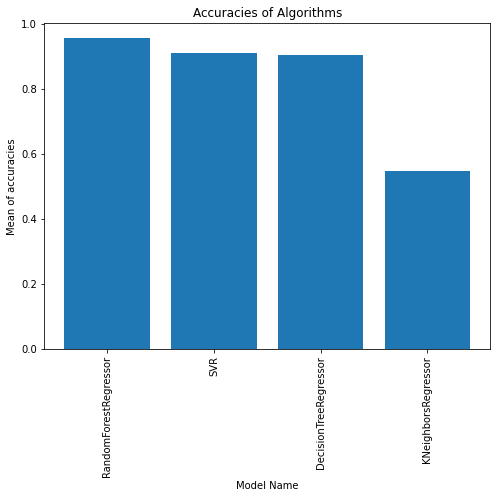

In [ ]:
cv_df.drop(index=0, axis=0, inplace=True)
cv_df['accuracy'] = cv_df['accuracy'].astype(float)

plt.figure(figsize=(8,6))
plt.bar(cv_df['model_name'], cv_df['accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Mean of accuracies')
plt.xticks(rotation='vertical')
plt.title('Accuracies of Algorithms')
plt.show()

Mô hình Random Forest Regressor cho kết quả tốt nhất với độ chính xác là 95.51%.

# Xây Dựng Mô Hình: <a name="xaydungmohinh"></a>

## Chọn Thuộc Tính Tốt Nhất:

In [ ]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestRegressor())
sel.fit(X_train, y_train.values.ravel())
selected_feat= X_train.columns[(sel.get_support())]
print('Best features after using SelectFromModel: {}\n'.format(len(selected_feat)))
print(selected_feat)

Best features after using SelectFromModel: 2

Index(['co2_level', 'fuel_type_Diesel'], dtype='object')


In [ ]:
features_new = features[selected_feat]
features_new.head()

,co2_level,fuel_type_Diesel
0,0.184080,0
1,0.208955,0
2,0.263682,0
3,0.184080,0
4,0.288557,0


co2_level và fuel_type_Diesel là hai thuộc tính tốt nhất.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_new, target, test_size=0.3, random_state=42)

## Chọn Tham Số Tốt Nhất:

### Chọn Tham Số Ngẫu Nhiên Với RandomizedSearchCV:

Trước tiên, tôi sẽ chọn ra một bộ tham số  với RandomizedSearchCV. Mục đích:
- Giới hạn lại vùng tham số cho GridSearchCV
- Tăng tốc việc lựa chọn tham số cho GridSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train2, y_train2.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

### Chọn Tham Số Tốt Nhất Với GridSearchCV:

Sau khi đã có một bộ tham số chuẩn. Tôi sẽ tiếp tục chọn tham số tốt nhất với GridSearchCV.

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [100, 150, 200, 250]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train2, y_train2.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.1min finished


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 250}

In [ ]:
rf1 = RandomForestRegressor(bootstrap=True,
                                max_depth=60,
                                max_features='sqrt',
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=250)

rf1.fit(X_train2, y_train2.values.ravel())

RandomForestRegressor(max_depth=60, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=250)

In [ ]:
scoring = ['explained_variance', 'r2']
scores = cross_validate(rf1, X=features_new, y=target.values.ravel(), scoring=scoring)

In [ ]:
scores

{'fit_time': array([1.07182193, 0.96077037, 0.87282848, 1.10024643, 1.18509746]),
 'score_time': array([0.0580945 , 0.0588727 , 0.03412414, 0.07749891, 0.05141449]),
 'test_explained_variance': array([0.95169987, 0.95969849, 0.97329535, 0.96686148, 0.97683278]),
 'test_r2': array([0.95125434, 0.95948003, 0.97243271, 0.96514199, 0.97675285])}

**Kết Luận:** Mô hình không bị overfiting hoặc underfiting chỉ với hai features là `co2_level` và `fuel_type_Diesel`. Score từ `explained_varianced` và `r2` đều có cho kết quả trung bình trên lần lượt là 96.57% và 96.50%. Như vậy, việc điều chỉnh tham số đã giúp tăng độ chính xác `explained_varianced` lên 1.06%.

Mô hình RF với những tham số phía trên là phù hợp.

### Trực Quan Hoá Kết Quả:

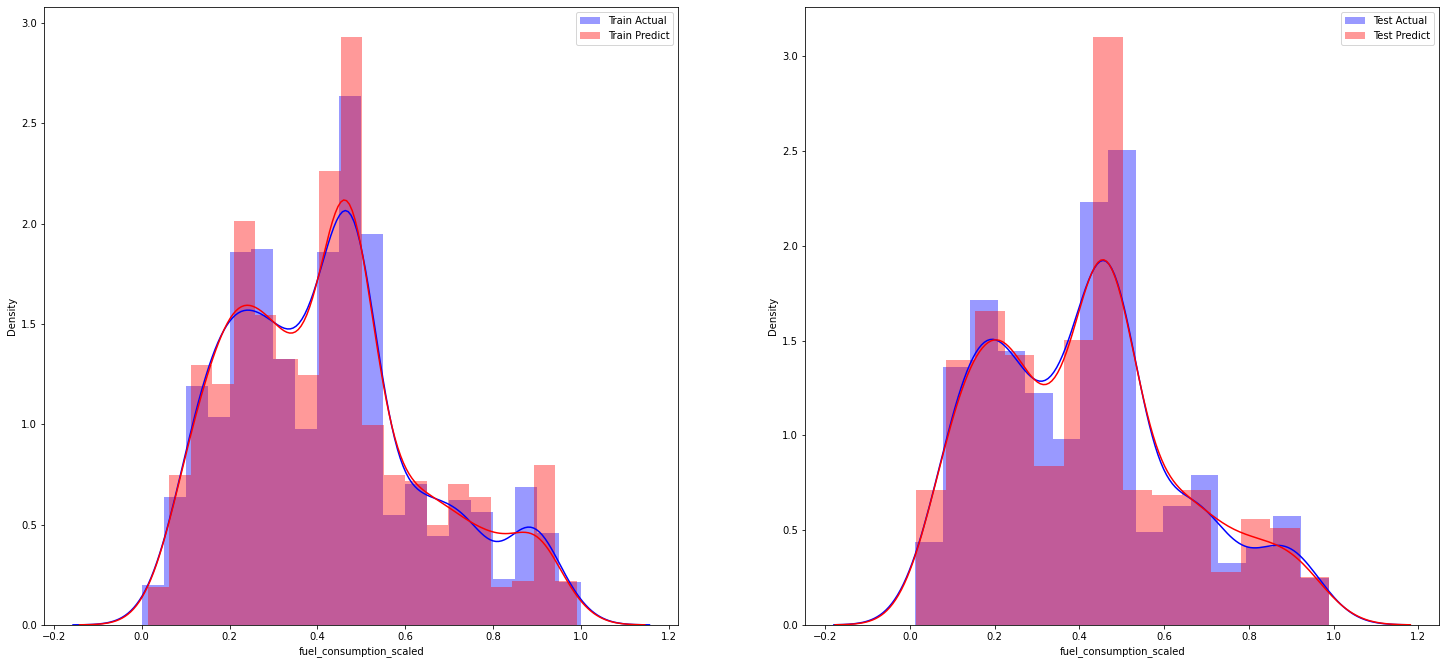

In [ ]:
y_train_hat = rf1.predict(X_train2)
y_test_hat = rf1.predict(X_test2)

fig = plt.figure(figsize=(25,25))
ax1 = fig.add_subplot(221)
ax1 = sns.distplot(x=y_train2, hist=True, color='b', label='Train Actual')
ax1 = sns.distplot(x=y_train_hat, hist=True, color='r', label='Train Predict')
ax1.legend()
ax1.set_xlabel('fuel_consumption_scaled')

ax2 = fig.add_subplot(222)
ax2 = sns.distplot(x=y_test2, hist=True, color='b', label='Test Actual')
ax2 = sns.distplot(x=y_test_hat, hist=True, color='r', label='Test Predict')
ax2.legend()
ax2.set_xlabel('fuel_consumption_scaled')

plt.show()

Biểu đồ cũng cho thấy kết quả tương tự. Khi mà các đường phân phối giữa Actual và Predict ở cả 2 bộ Test, Train data đều gần như trùng khớp với nhau.

# Xây Dựng Mô Hình Mới (Không Loại Bỏ Outlier) <a name="xaydungmohinh2"></a>

Với mô hình trước, chúng ta loại bỏ những Outlier ra khỏi dữ liệu. Chúng ta đạt độ chính xác 96.57% với mô hình RF. Ở phần này, tôi sẽ giữ lại những outlier để xem nó sẽ ảnh hưởng như thế nào đến mô hình.

In [ ]:
data_sub2 = data[['make', 'body_type_extracted', 'doors', 'seating_capacity', 'transmission_type',
                 'drive_type', 'engine_cc', 'cylinders', 'fuel_type', 'fuel_consumption_L_100km',
                 'co2_level', 'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm',
                 'year']]

Vì chúng ta không loại bỏ outlier, nên không thể tiếp tục dùng MinMaxScaler. Thay vào đó tôi sẽ dùng RobustScaler.

In [ ]:
scaler2 = preprocessing.RobustScaler()

In [ ]:
data_sub_scaled2 = scaler2.fit_transform(data_sub2[['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']])

In [ ]:
data_sub_scaled2 = pd.DataFrame(data_sub_scaled2, columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm'])

data_sub_scaled2.head()

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm
0,-0.961203,-0.692308,-0.785714,-0.448795,-2.350348,-3.152778,-1.672598
1,-0.961203,-0.615385,-0.714286,-0.448795,-2.350348,-3.152778,-1.672598
2,-0.961203,-0.423077,-0.557143,-1.207831,-1.429234,-1.583333,-1.637011
3,-0.961203,-0.692308,-0.785714,-0.448795,-2.350348,-3.152778,-1.672598
4,-0.961203,-2.923077,-0.714286,-0.448795,-2.350348,-3.152778,-1.672598


In [ ]:
data_sub_encoded2 = pd.get_dummies(data_sub2, columns=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'],
                                  prefix=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'])

In [ ]:
data_sub_encoded2.head()

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm,make_Abarth,make_Alfa Romeo,make_Audi,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,1368.0,5.8,134,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1368.0,6.0,139,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1368.0,6.5,150,1233,4054,1740,2310,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1368.0,5.8,134,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1368.0,0.0,139,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_sub_encoded2 = data_sub_encoded2.drop(columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level',
                                                  'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm',
                                                  'wheelbase_mm', 'year_2007'])

In [ ]:
data_sub_encoded2.reset_index(drop=True, inplace=True)

In [ ]:
data_sub_scaled2.reset_index(drop=True, inplace=True)

In [ ]:
data_sub_scaled2.shape

(1954, 7)

In [ ]:
data_sub_encoded2.shape

(1954, 62)

In [ ]:
final_data2 = pd.concat([data_sub_scaled2, data_sub_encoded2], axis=1)

In [ ]:
final_data2.shape

(1954, 69)

In [ ]:
features2 = final_data2.drop(columns=['fuel_consumption_L_100km', 'overal_height_mm', 'overal_lenght_mm',
                                    'overal_width_mm', 'wheelbase_mm', 'transmission_type_Automatic',
                                    'transmission_type_Manual'])

In [ ]:
target2 = final_data2[['fuel_consumption_L_100km']]

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(features2, target2, test_size=0.3, random_state=42)

In [ ]:
models2 = [LinearRegression(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          SVR('linear')]

CV2 = 5
cv_df2 = pd.DataFrame(index=range(CV2 * len(models2)))
entries2 = []
i = 0
for model_nd in models2:
    model_name2 = model_nd.__class__.__name__
    accuracies2 = cross_val_score(model_nd, features2, target2.values.ravel(), scoring='explained_variance', cv=CV2)
    print(accuracies2) 
    entries2.append([model_name2, accuracies2.mean()])
    i += 1
cv_df2 = pd.DataFrame(entries2, columns=['model_name', 'accuracy'])

/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[-9.68699158e+23 -1.19445845e+23 -2.67066460e+23  9.35991882e-01
 -2.70412044e+23]
[0.70857162 0.74566135 0.75119495 0.88337797 0.43065464]
[0.13262837 0.81334037 0.9196883  0.92533718 0.70887784]
[0.58556721 0.93385166 0.96345849 0.94369183 0.74074439]
[0.82310755 0.95581055 0.97301543 0.96538017 0.75518312]


In [ ]:
cv_df2['accuracy'] = cv_df2['accuracy'].apply(lambda x: '%.5f' % x)
cv_df2.sort_values(by=['accuracy'], ascending=False, inplace=True)
cv_df2

,model_name,accuracy
4,SVR,0.89450
3,RandomForestRegressor,0.83346
1,KNeighborsRegressor,0.70389
2,DecisionTreeRegressor,0.69997
0,LinearRegression,-325124701433171927891968.00000


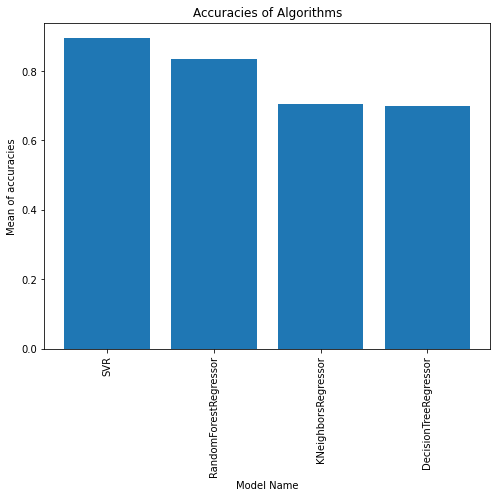

In [ ]:
cv_df2.drop(index=0, axis=0, inplace=True)
cv_df2['accuracy'] = cv_df2['accuracy'].astype(float)

plt.figure(figsize=(8,6))
plt.bar(cv_df2['model_name'], cv_df2['accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Mean of accuracies')
plt.xticks(rotation='vertical')
plt.title('Accuracies of Algorithms')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sel2 = SelectFromModel(SVR('linear'))
sel2.fit(X_train3, y_train3.values.ravel())
selected_feat2= X_train3.columns[(sel2.get_support())]
print('Best features after using SelectFromModel: {}\n'.format(len(selected_feat2)))
print(selected_feat2)

/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Best features after using SelectFromModel: 14

Index(['engine_cc', 'co2_level', 'make_Abarth', 'make_Alfa Romeo',
       'make_Holden', 'make_Renault', 'make_Subaru',
       'body_type_extracted_People Mover', 'body_type_extracted_Ute / Tray',
       'cylinders_5', 'cylinders_8', 'fuel_type_Diesel', 'fuel_type_Premium',
       'fuel_type_Unleaded'],
      dtype='object')


In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(features_new2, target2, test_size=0.3, random_state=42)

In [ ]:
parameters = {'C':[1.0, 1.5, 2.0, 2.5],
              'gamma': ['scale', 'auto'],
              'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR('linear')
clf2 = GridSearchCV(svr, parameters)
clf2.fit(X_train4, y_train4.values.ravel())
clf2.best_params_

/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


{'C': 2.5, 'epsilon': 0.1, 'gamma': 'scale'}

In [ ]:
svr1 = SVR('linear', C=2.5, epsilon=0.1, gamma='scale')

svr1.fit(X_train4, y_train4.values.ravel())

/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


SVR(C=2.5, kernel='linear')

In [ ]:
scoring2 = ['explained_variance', 'r2']
scores2 = cross_validate(svr1, X=features_new2, y=target2.values.ravel(), scoring=scoring2)

In [ ]:
scores2

{'fit_time': array([0.22606158, 0.41256976, 0.38411736, 0.23389125, 0.34093094]),
 'score_time': array([0.02586985, 0.00702119, 0.01784635, 0.02348042, 0.0053916 ]),
 'test_explained_variance': array([0.81952781, 0.95824101, 0.97362946, 0.9652781 , 0.75109471]),
 'test_r2': array([0.81892726, 0.95685114, 0.97190385, 0.9651762 , 0.74900854])}

**Nhận Xét:**
Dưới đây là bảng so sánh giữa mô hình chạy trên tập dữ liệu có outliers và không có outliers.

Có thể thấy những thay đổi như sau:
- Sử dụng phương pháp scale khác nhau
- Sử dụng mô hình khác nhau
- Số lượng Features tốt nhất khác nhau. SVR sử dụng nhiều gấp 7 lần RF.
- Độ chính xác khác nhau. RF chạy trên bộ dữ liệu không có outliers cho kết quả tốt hơn nhiều (khoảng 7%).

Như vậy, dữ liệu được xử lý outlier sẽ cho kết quả tốt hơn và sử dụng features ít hơn so với dữ liệu chưa được xử lý.

| Scaler       | Scaler       | Model        | Model       | #Features    | #Features   | Accuracy Before Tuning | Accuracy Before Tuning | Accuracy After Tuning | Accuracy After Tuning |
|--------------|--------------|--------------|-------------|--------------|-------------|------------------------|------------------------|-----------------------|-----------------------|
| w/o Outliers | w/ Outliers  | w/o Outliers | w/ Outliers | w/o Outliers | w/ Outliers | w/o Outliers           | w/ Outliers            | w/o Outliers          | w/ Outliers           |
| MinMaxScaler | RobustScaler | RF           | SVR         | 2            | 14          | 95.51%                 | 89.45%                 | 96.57%                | 89.36%                |

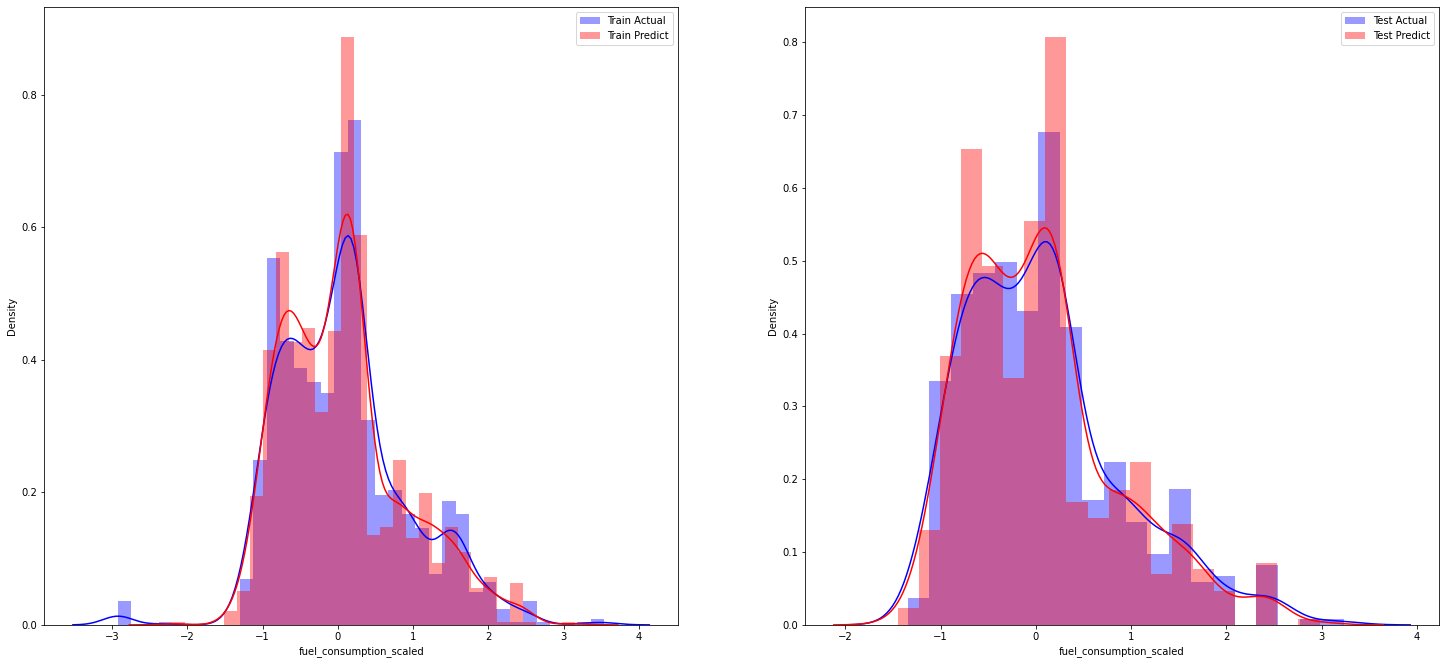

In [ ]:
y_train_hat2 = svr1.predict(X_train4)
y_test_hat2 = svr1.predict(X_test4)

fig2 = plt.figure(figsize=(25,25))
ax12 = fig2.add_subplot(221)
ax12 = sns.distplot(x=y_train4, hist=True, color='b', label='Train Actual')
ax12 = sns.distplot(x=y_train_hat2, hist=True, color='r', label='Train Predict')
ax12.legend()
ax12.set_xlabel('fuel_consumption_scaled')

ax22 = fig2.add_subplot(222)
ax22 = sns.distplot(x=y_test4, hist=True, color='b', label='Test Actual')
ax22 = sns.distplot(x=y_test_hat2, hist=True, color='r', label='Test Predict')
ax22.legend()
ax22.set_xlabel('fuel_consumption_scaled')

plt.show()

Trực quan hoá kết quả với mô hình SVR cũng cho thấy các đường giữa giá trị Predict và Actual nhiều đoạn vẫn còn cách xa nhau trên cả hai tập Train và Test.

# Mô Hình RFR (Không Loại Bỏ Outlier) <a name="xaydungmohinh3"></a>

In [ ]:
data_sub3 = data[['make', 'body_type_extracted', 'doors', 'seating_capacity', 'transmission_type',
                 'drive_type', 'engine_cc', 'cylinders', 'fuel_type', 'fuel_consumption_L_100km',
                 'co2_level', 'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm',
                 'year']]

In [ ]:
data_sub_scaled3 = scaler.fit_transform(data_sub3[['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']])

In [ ]:
data_sub_scaled3 = pd.DataFrame(data_sub_scaled3, columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm'])

data_sub_scaled3.head()

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm
0,0.085052,0.345238,0.282799,0.373449,0.000000,0.000000,0.446140
1,0.085052,0.357143,0.297376,0.373449,0.000000,0.000000,0.446140
2,0.085052,0.386905,0.329446,0.060794,0.227899,0.253363,0.450763
3,0.085052,0.345238,0.282799,0.373449,0.000000,0.000000,0.446140
4,0.085052,0.000000,0.297376,0.373449,0.000000,0.000000,0.446140


In [ ]:
data_sub_encoded3 = pd.get_dummies(data_sub3, columns=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'],
                                  prefix=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'])

In [ ]:
data_sub_encoded3.head()

,engine_cc,fuel_consumption_L_100km,co2_level,overal_height_mm,overal_lenght_mm,overal_width_mm,wheelbase_mm,make_Abarth,make_Alfa Romeo,make_Audi,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,1368.0,5.8,134,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1368.0,6.0,139,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1368.0,6.5,150,1233,4054,1740,2310,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1368.0,5.8,134,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1368.0,0.0,139,1485,3657,1627,2300,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_sub_encoded3 = data_sub_encoded3.drop(columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level',
                                                  'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm',
                                                  'wheelbase_mm', 'year_2007'])

In [ ]:
data_sub_encoded3.reset_index(drop=True, inplace=True)

In [ ]:
data_sub_scaled3.reset_index(drop=True, inplace=True)

In [ ]:
final_data3 = pd.concat([data_sub_scaled3, data_sub_encoded3], axis=1)

In [ ]:
features3 = final_data3.drop(columns=['fuel_consumption_L_100km', 'overal_height_mm', 'overal_lenght_mm',
                                    'overal_width_mm', 'wheelbase_mm', 'transmission_type_Automatic',
                                    'transmission_type_Manual'])

In [ ]:
target3 = final_data3[['fuel_consumption_L_100km']]

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(features3, target3, test_size=0.3, random_state=42)

In [ ]:
n_estimators3 = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features3 = ['auto', 'sqrt']
max_depth3 = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth3.append(None)
min_samples_split3 = [2, 5, 10]
min_samples_leaf3 = [1, 2, 4]
bootstrap3 = [True, False]

random_grid3 = {'n_estimators': n_estimators3,
               'max_features': max_features3,
               'max_depth': max_depth3,
               'min_samples_split': min_samples_split3,
               'min_samples_leaf': min_samples_leaf3,
               'bootstrap': bootstrap3}
print(random_grid3)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
rf3 = RandomForestRegressor()
rf_random3 = RandomizedSearchCV(estimator = rf3, param_distributions = random_grid3, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random3.fit(X_train4, y_train4.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random3.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
param_grid3 = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [4, 5, 6],
    'n_estimators': [400, 500, 600, 700]
}

rf3 = RandomForestRegressor()

grid_search3 = GridSearchCV(estimator = rf3, param_grid = param_grid3, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search3.fit(X_train4, y_train4.values.ravel())
grid_search3.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  7.4min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
rf3 = RandomForestRegressor(bootstrap=True,
                                max_depth=90,
                                max_features='auto',
                                min_samples_leaf=1,
                                min_samples_split=5,
                                n_estimators=400)

rf3.fit(X_train4, y_train4.values.ravel())

RandomForestRegressor(max_depth=90, min_samples_split=5, n_estimators=400)

In [ ]:
scoring3 = ['explained_variance', 'r2']
scores3 = cross_validate(rf3, X=features3, y=target3.values.ravel(), scoring=scoring3)

In [ ]:
scores3

{'fit_time': array([1.89559674, 1.91671181, 2.03276896, 2.02870536, 1.92274642]),
 'score_time': array([0.03700161, 0.03791308, 0.03341985, 0.03533959, 0.03690767]),
 'test_explained_variance': array([0.56761988, 0.93707095, 0.96216496, 0.94862171, 0.74633537]),
 'test_r2': array([0.5542708 , 0.93699754, 0.96201052, 0.94777418, 0.74354089])}

**Nhận xét**: Mô hình RFR trên dữ liệu không loại bỏ outliers có độ chính xác lần lượt là:
- explained_variance: 83.23%
- r2: 82.89%

So với RFR trên dữ liệu đã loại bỏ outliers là:
- explained_variance: 96.57%
- r2: 96.50%

Như vậy, loại bỏ outliers giúp mô hình dự đoán chính xác hơn.

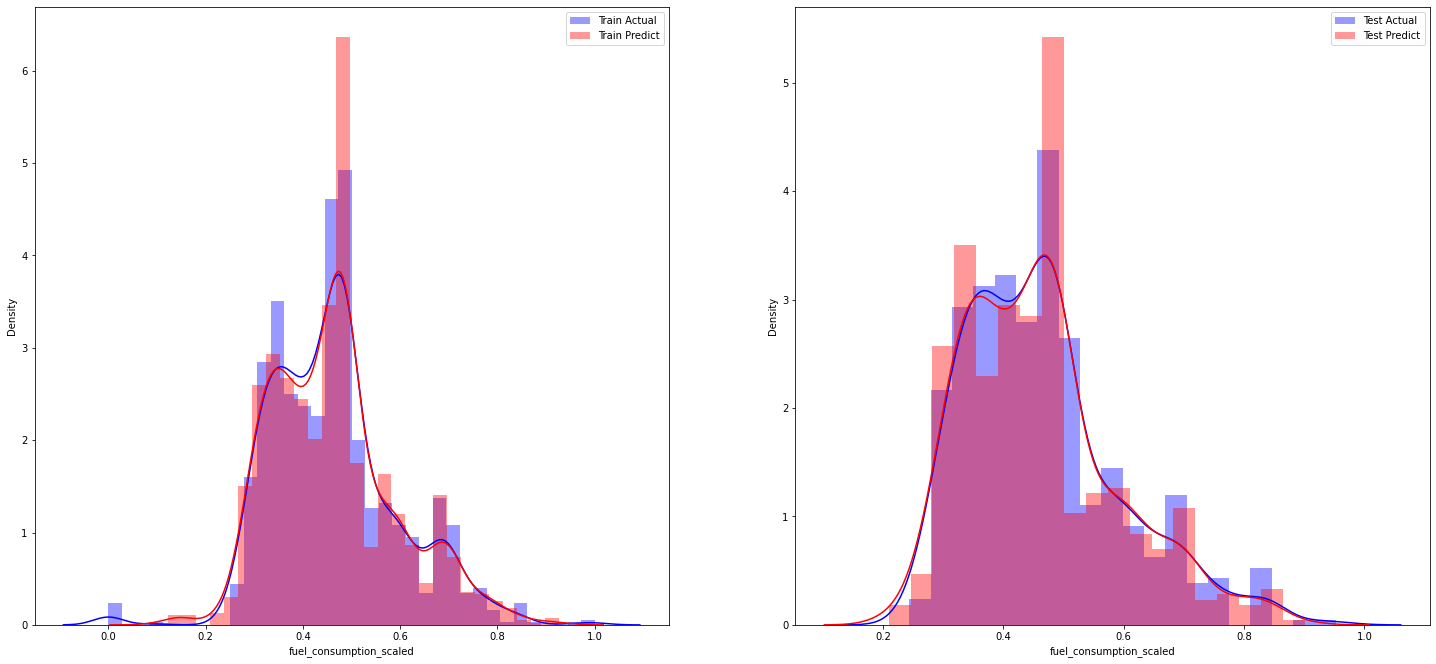

In [ ]:
y_train_hat3 = rf3.predict(X_train4)
y_test_hat3 = rf3.predict(X_test4)

fig3 = plt.figure(figsize=(25,25))
ax13 = fig3.add_subplot(221)
ax13 = sns.distplot(x=y_train4, hist=True, color='b', label='Train Actual')
ax13 = sns.distplot(x=y_train_hat3, hist=True, color='r', label='Train Predict')
ax13.legend()
ax13.set_xlabel('fuel_consumption_scaled')

ax23 = fig3.add_subplot(222)
ax23 = sns.distplot(x=y_test4, hist=True, color='b', label='Test Actual')
ax23 = sns.distplot(x=y_test_hat3, hist=True, color='r', label='Test Predict')
ax23.legend()
ax23.set_xlabel('fuel_consumption_scaled')

plt.show()

In [ ]:
data_sub4 = final_data[['fuel_type_Diesel', 'fuel_consumption_L_100km']]

# Giải Pháp Giảm Tiêu Thụ Nhiên Liệu <a name="giaiphap"></a>

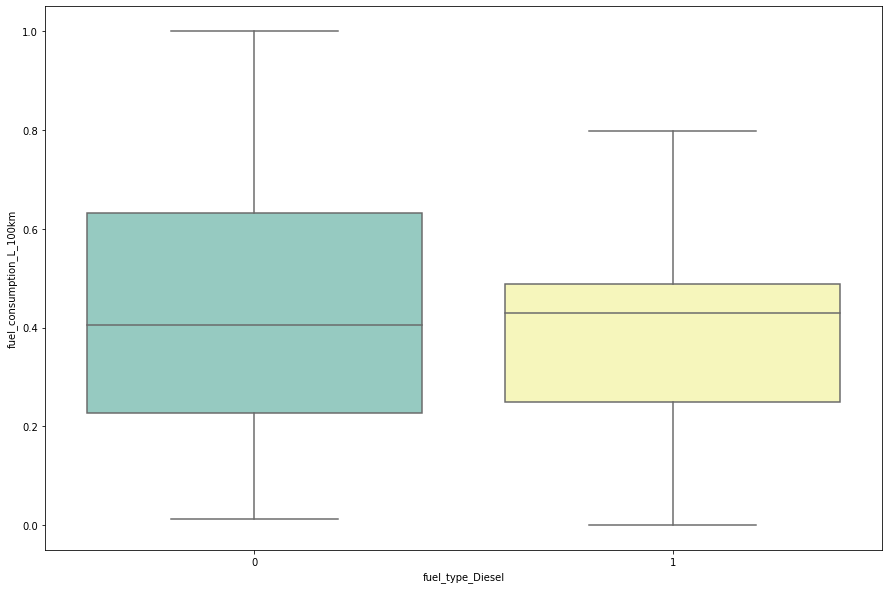

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='fuel_type_Diesel', y='fuel_consumption_L_100km', data=data_sub4, palette='Set3')
plt.show()

Chúng ta biết rằng, lượng khí thải CO2 có tỉ lệ thuận mạnh với mức tiêu thụ nhiên liệu. Loại nhiên liệu sử dụng cũng là yếu tố ảnh hưởng mạnh đến mô hình RFR. Ở trên là biểu đồ boxplot của biến fuel_type_Diesel với fuel_consumption_L_100km. Có thể thấy rằng, nhiên liệu diesel có Q3 và Max value đều thấp hơn động cơ sử dụng nhiên liệu xăng. Như vậy, động cơ dùng nhiên liệu diesel sẽ giảm thiểu lượng tiêu thụ nhiên liệu từ đó giảm lượng khí thải CO2 vào môi trường.

# Bổ Sung <a name="bosung"></a>

Trong phần này, tôi muốn phân tích thêm những vấn đề còn tồn đọng. Tuy nhiên, tôi không muốn làm ảnh hưởng đến phần code ở trên.

## Dữ Liệu Missing Thuộc Loại Nào?

In [ ]:
frames = [abarth, alfa_romeo, audi, chrysler, dodge, isuzu, jeep, renault, skoda]
data11 = pd.concat(frames)

In [ ]:
data11.drop(columns=['Unnamed: 0'], inplace=True)
#convert `-` to `""`
data11.replace(to_replace='^-$', value='', inplace=True, regex=True)
#convert `""` to null
data11.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7266 entries, 0 to 753
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              7266 non-null   object
 1   make               7266 non-null   object
 2   family             7266 non-null   object
 3   variant            7206 non-null   object
 4   series             7112 non-null   object
 5   body_type          7266 non-null   object
 6   doors              7265 non-null   object
 7   seating_capacity   7266 non-null   int64 
 8   transmission_type  7266 non-null   object
 9   drive_type         7266 non-null   object
 10  engine_cc          7259 non-null   object
 11  cylinders          7259 non-null   object
 12  fuel_type          7266 non-null   object
 13  fuel_consumption   7266 non-null   object
 14  co2_level          6742 non-null   object
 15  overal_height      7265 non-null   object
 16  overal_lenght      7257 non-null   object
 

In [ ]:
data11[['title', 'co2_level']][data11.isnull().any(axis=1)]

,title,co2_level
3,2019 Abarth 595,134
4,2019 Abarth 595C,139
6,2019 Abarth 595C,134
7,2019 Abarth 595C,139
14,2019 Abarth 595C,134
...,...,...
834,2003 Renault Clio Privilege,NaN
835,2003 Renault Clio Privilege,NaN
836,2002 Renault Laguna Privilege LX,NaN
837,2002 Renault Scenic Dynamique,NaN


Ít nhất đối với cột co2_level, thì dữ liệu missing ở loại MNAR. Khi mà từ năm 2007 trở về trước, không có thông tin của co2 level.

## Sử Dụng XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
features11 =  features[['co2_level', 'fuel_type_Diesel']]

In [ ]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(features11, target, test_size=0.3, random_state=42)

In [ ]:
#tham số tương đương RFR
xgb_model = xgb.XGBRFRegressor(max_depth=60, 
                               max_features='sqrt', 
                               min_samples_leaf=2, 
                               min_samples_split=2, 
                               n_estimators=250)

xgb_model.fit(X_train11, y_train11)

[12:10:25] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=60,
               max_features='sqrt', min_child_weight=1, min_samples_leaf=2,
               min_samples_split=2, missing=nan, monotone_constraints='()',
               n_estimators=250, n_jobs=0, num_parallel_tree=250,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [ ]:
scores11 = cross_val_score(xgb_model, X_train11, y_train11, cv=5, scoring='explained_variance')
scores11

[12:12:06] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:07] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:12:09] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XG

array([0.87103376, 0.86389714, 0.85759694, 0.90414545, 0.88744768])

Sử dụng xgboost không làm tăng độ chính xác của mô hình với những tham số tương tự như RFR. Độ chính xác trung bình của XGBoost chỉ vào khoảng 87.68%.

## Mô Hình RFR Mới (Giữ Lại Dữ Liệu Trùng Lặp)

Ở phần trước, tôi đã bỏ đi hơn 70% dữ liệu trùng lặp. Trong phần này, tôi muốn làm thêm một so sánh giữa RFR trên dữ liệu đã bỏ trùng lặp và chưa bỏ trùng lặp. Các tham số của RFR và chỉ số đánh giá được giữ nguyên.

In [ ]:
frames = [abarth, alfa_romeo, audi, chrysler, dodge, isuzu, jeep, renault, skoda]
data113 = pd.concat(frames)
data113.drop(columns=['Unnamed: 0'], inplace=True)
#convert `-` to `""`
data113.replace(to_replace='^-$', value='', inplace=True, regex=True)
#convert `""` to null
data113.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
data113.dropna(inplace=True)
data113.reset_index()

,index,title,make,family,variant,series,body_type,doors,seating_capacity,transmission_type,drive_type,engine_cc,cylinders,fuel_type,fuel_consumption,co2_level,overal_height,overal_lenght,overal_width,wheelbase
0,0,2019 Abarth 595C Competizione,Abarth,595C,Competizione,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Automatic,Front,1368,4,Unleaded,5.8 L / 100 km,134,1485 mm,3657 mm,1627 mm,2300 mm
1,1,2019 Abarth 595C Competizione,Abarth,595C,Competizione,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Manual,Front,1368,4,Unleaded,6 L / 100 km,139,1485 mm,3657 mm,1627 mm,2300 mm
2,2,2019 Abarth 124 Spider,Abarth,124,Spider,Series 1,"Convertible, 2 Doors, 2 Seats",2,2,Manual,Rear,1368,4,Premium,6.5 L / 100 km,150,1233 mm,4054 mm,1740 mm,2310 mm
3,5,2019 Abarth 595 Competizione,Abarth,595,Competizione,Series 4,"Hatchback, 3 Doors, 4 Seats",3,4,Automatic,Front,1368,4,Unleaded,5.8 L / 100 km,134,1485 mm,3657 mm,1627 mm,2300 mm
4,8,2019 Abarth 695C Rivale,Abarth,695C,Rivale,Series 4,"Convertible, 2 Doors, 4 Seats",2,4,Automatic,Front,1368,4,Unleaded,0 L / 100 km,139,1485 mm,3657 mm,1627 mm,2300 mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6590,749,2008 Skoda Roomster 1.6,Skoda,Roomster,1.6,5J,"Wagon, 4 Doors, 5 Seats",4,5,Automatic,Front,1598,4,Premium,7.7 L / 100 km,185,1607 mm,4205 mm,1684 mm,2617 mm
6591,750,2008 Skoda Octavia RS TDI,Skoda,Octavia,RS TDI,1Z,"Wagon, 4 Doors, 5 Seats",4,5,Automatic,Front,1968,4,Diesel,6 L / 100 km,159,1447 mm,4578 mm,1769 mm,2578 mm
6592,751,2008 Skoda Octavia Elegance,Skoda,Octavia,Elegance,1Z,"Wagon, 4 Doors, 5 Seats",4,5,Automatic,Front,1984,4,Premium,8.5 L / 100 km,203,1462 mm,4572 mm,1769 mm,2578 mm
6593,752,2007 Skoda Octavia RS,Skoda,Octavia,RS,1Z,"Wagon, 4 Doors, 5 Seats",4,5,Manual,Front,1984,4,Premium,7.9 L / 100 km,193,1447 mm,4578 mm,1769 mm,2578 mm


In [ ]:
data113.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6595 entries, 0 to 753
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              6595 non-null   object
 1   make               6595 non-null   object
 2   family             6595 non-null   object
 3   variant            6595 non-null   object
 4   series             6595 non-null   object
 5   body_type          6595 non-null   object
 6   doors              6595 non-null   object
 7   seating_capacity   6595 non-null   int64 
 8   transmission_type  6595 non-null   object
 9   drive_type         6595 non-null   object
 10  engine_cc          6595 non-null   object
 11  cylinders          6595 non-null   object
 12  fuel_type          6595 non-null   object
 13  fuel_consumption   6595 non-null   object
 14  co2_level          6595 non-null   object
 15  overal_height      6595 non-null   object
 16  overal_lenght      6595 non-null   object
 

In [ ]:
data113['wheelbase_mm'] = data113['wheelbase'].apply(get_overal_fig)
data113['year'] = data113['title'].apply(get_year)
data113['year'] = data113['year'].astype(int)
data113['body_type_extracted'] = data113['body_type'].apply(get_body_type)
data113['doors'] = data113['doors'].astype(int)
data113['engine_cc'] = data113['engine_cc'].astype(float)
data113['cylinders'] = data113['cylinders'].astype(int)
data113['fuel_consumption_L_100km'] = data113['fuel_consumption'].apply(get_fuel_consumption)
data113['co2_level'] = data113['co2_level'].astype(int)
data113['overal_height_mm'] = data113['overal_height'].apply(get_overal_fig)
data113['overal_lenght_mm'] = data113['overal_lenght'].apply(get_overal_fig)
data113['overal_width_mm'] = data113['overal_width'].apply(get_overal_fig)

data_sub113 = data113[['make', 'body_type_extracted', 'doors', 'seating_capacity', 'transmission_type',
                 'drive_type', 'engine_cc', 'cylinders', 'fuel_type', 'fuel_consumption_L_100km',
                 'co2_level', 'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm',
                 'year']]

Q11 = np.percentile(data_sub113['engine_cc'], 25)
Q31 = np.percentile(data_sub113['engine_cc'], 75)
IQR1 = iqr(data_sub113['engine_cc'])

df_outlier1 = data_sub113[(data_sub113['engine_cc'] < (Q11 - 1.5*IQR1)) | (data_sub113['engine_cc'] > (Q31 + 1.5*IQR1))]

Q12 = np.percentile(data_sub113['fuel_consumption_L_100km'], 25)
Q32 = np.percentile(data_sub113['fuel_consumption_L_100km'], 75)
IQR2 = iqr(data_sub113['fuel_consumption_L_100km'])

df_outlier2 = data_sub113[(data_sub113['fuel_consumption_L_100km'] < (Q12 - 1.5*IQR2)) | (data_sub113['fuel_consumption_L_100km'] > (Q32 + 1.5*IQR2))]

Q13 = np.percentile(data_sub113['co2_level'], 25)
Q33 = np.percentile(data_sub113['co2_level'], 75)
IQR3 = iqr(data_sub113['co2_level'])

df_outlier3 = data_sub113[(data_sub113['co2_level'] < (Q13 - 1.5*IQR3)) | (data_sub113['co2_level'] > (Q33 + 1.5*IQR3))]

outliers_idx = df_outlier1.index.tolist() + df_outlier2.index.tolist() + df_outlier3.index.tolist()

data_sub113.drop(axis=0, index=outliers_idx, inplace=True)

data_sub113.reset_index(drop=True, inplace=True)

data_scaled113 = data_sub113[['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']]

data_sub_scaled113 = scaler.fit_transform(data_sub113[['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm']])

data_sub_scaled113 = pd.DataFrame(data_sub_scaled113, columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level', 'overal_height_mm',
                        'overal_lenght_mm', 'overal_width_mm', 'wheelbase_mm'])

data_sub_encoded113 = pd.get_dummies(data_sub113, columns=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'],
                                  prefix=['make', 'body_type_extracted', 'doors', 'seating_capacity',
                                                     'transmission_type', 'drive_type', 'cylinders', 'fuel_type',
                                                     'year'])

data_sub_encoded113 = data_sub_encoded113.drop(columns=['engine_cc', 'fuel_consumption_L_100km', 'co2_level',
                                                  'overal_height_mm', 'overal_lenght_mm', 'overal_width_mm',
                                                  'wheelbase_mm', 'year_2007'])

data_sub_scaled113.reset_index(drop=True, inplace=True)
data_sub_encoded113.reset_index(drop=True, inplace=True)
final_data113 = pd.concat([data_sub_scaled113, data_sub_encoded113], axis=1)

/home/jovyan/venv_3_8_2/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
final_data113.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   engine_cc                         4464 non-null   float64
 1   fuel_consumption_L_100km          4464 non-null   float64
 2   co2_level                         4464 non-null   float64
 3   overal_height_mm                  4464 non-null   float64
 4   overal_lenght_mm                  4464 non-null   float64
 5   overal_width_mm                   4464 non-null   float64
 6   wheelbase_mm                      4464 non-null   float64
 7   make_Abarth                       4464 non-null   uint8  
 8   make_Alfa Romeo                   4464 non-null   uint8  
 9   make_Audi                         4464 non-null   uint8  
 10  make_Chrysler                     4464 non-null   uint8  
 11  make_Dodge                        4464 non-null   uint8  
 12  make_F

Như vậy, chỉ khoảng 30% dữ liệu bị loại bỏ. Nguyên nhân là do các outliers.

In [ ]:
features113 = final_data113.drop(columns=['co2_level', 'fuel_type_Diesel'])

target113 = final_data113[['fuel_consumption_L_100km']]

X_train113, X_test113, y_train113, y_test113 = train_test_split(features113, target113, test_size=0.3, random_state=42)

rf113 = RandomForestRegressor(bootstrap=True,
                                max_depth=60,
                                max_features='sqrt',
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=250)

rf113.fit(X_train113, y_train113.values.ravel())

scoring113 = ['explained_variance', 'r2']
scores113 = cross_validate(rf113, X=features113, y=target113.values.ravel(), scoring=scoring113)

scores113

{'fit_time': array([0.65852118, 0.6664927 , 0.70333385, 0.69354177, 0.65713906]),
 'score_time': array([0.03198671, 0.03121662, 0.02872753, 0.0300231 , 0.02947998]),
 'test_explained_variance': array([0.85103193, 0.69916464, 0.93455379, 0.96256007, 0.89136981]),
 'test_r2': array([0.72072838, 0.65486923, 0.93441662, 0.95462765, 0.89073742])}

Như vậy, mô hình RFR trên dữ liệu không loại bỏ trùng lặp đã bị giảm độ chính xác khi mà, explained_variance là 86.77% và r2 score là 83.11%, so với RFR trên dữ liệu đã loại bỏ trùng lặp lần lượt là 96.57% và 96.50%.

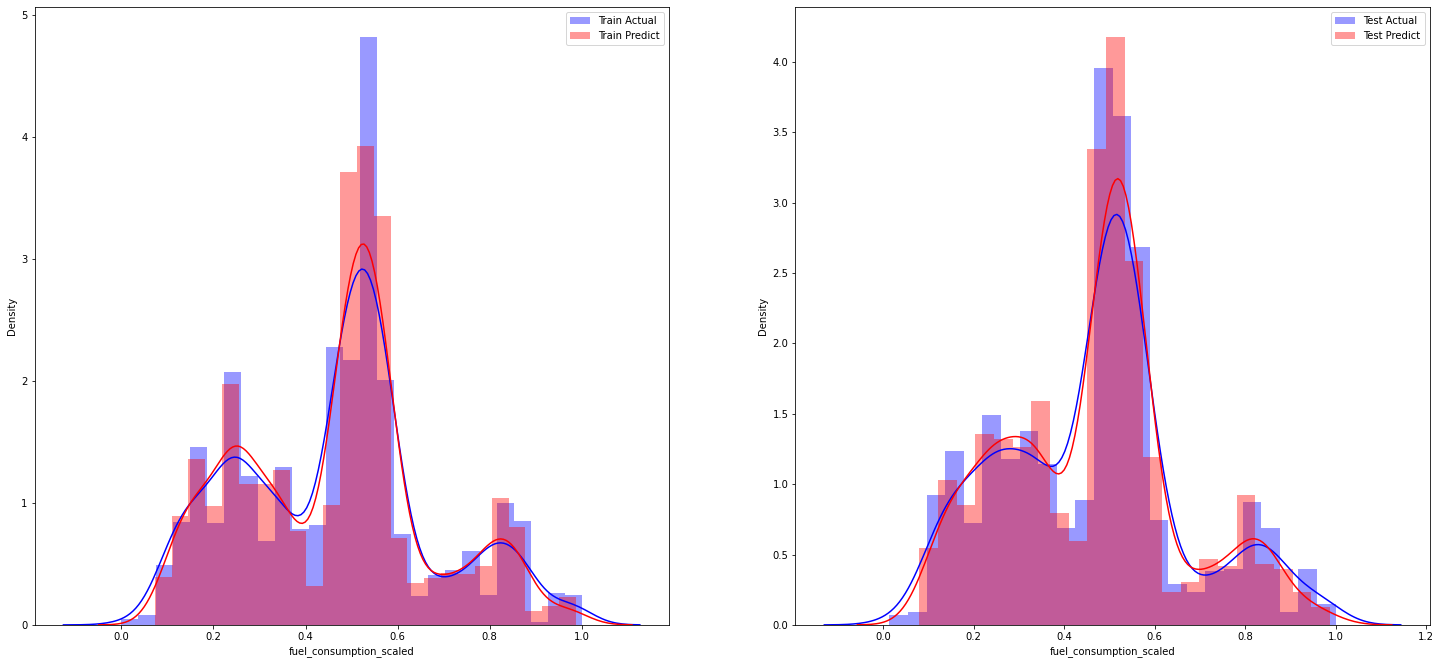

In [ ]:
y_train_hat113 = rf113.predict(X_train113)
y_test_hat113 = rf113.predict(X_test113)

fig113 = plt.figure(figsize=(25,25))
ax113 = fig113.add_subplot(221)
ax113 = sns.distplot(x=y_train113, hist=True, color='b', label='Train Actual')
ax113 = sns.distplot(x=y_train_hat113, hist=True, color='r', label='Train Predict')
ax113.legend()
ax113.set_xlabel('fuel_consumption_scaled')

ax213 = fig113.add_subplot(222)
ax213 = sns.distplot(x=y_test113, hist=True, color='b', label='Test Actual')
ax213 = sns.distplot(x=y_test_hat113, hist=True, color='r', label='Test Predict')
ax213.legend()
ax213.set_xlabel('fuel_consumption_scaled')

plt.show()